# 1. Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Algorithms and Evaluation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, precision_recall_fscore_support)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV


# 2. Load Dataset

In [ ]:
# Menghubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path file CSV di Google Drive
file_path = '/content/drive/My Drive/JAP Rakamin/Predict Customer Clicked Ads Classification by Using Machine Learning/Clicked_Ads_Dataset.csv'

# Membaca file CSV menggunakan pandas
df = pd.read_csv(file_path)

Mounted at /content/drive


# 3. Dataset Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


Key Takeaways:

- Dataset terdapat 1000 baris dan 11 kolom
- Dataset terdiri dari 2 kolom bertipe **int64**, 3 kolom bertipe **float64**, dan 6 kolom bertipe **object**
- Terdapa null value pada kolom **Daily Time Spent on Site**, **Area Income**, **Daily Internet Usage**,  dan **Male**.

In [ ]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
# Pengelompokkan Feature
num = df.select_dtypes(include=['float64', 'int64']).columns
cat = df.select_dtypes(include=['object']).columns

# 4. Statistic Descriptive

### Feature Numerical

In [ ]:
# Melihat jumlah value pada feature numerical
for column in df[num].columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'Unnamed: 0':
Unnamed: 0
0      1
671    1
658    1
659    1
660    1
      ..
338    1
339    1
340    1
341    1
999    1
Name: count, Length: 1000, dtype: int64


Value counts for column 'Daily Time Spent on Site':
Daily Time Spent on Site
84.53    3
75.55    3
78.76    3
77.05    3
62.26    3
        ..
61.09    1
65.77    1
37.87    1
60.91    1
45.01    1
Name: count, Length: 890, dtype: int64


Value counts for column 'Age':
Age
31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: count, dtype: int64


Value counts for column 'Area Income':
Area Income
432837300.0    1
265358030.0    1
422206330.0    1
471261000.0    1
35

In [ ]:
# Deskripsi Feature Numerical
df[num].describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


Key Takeaways:
- Feature **Area Income** Menunjukkan adanya outlier pada rentang nilai minimum.

### Feature Category

In [ ]:
# Melihat jumlah value pada kolom categorical
for column in df[cat].columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'Male':
Male
Perempuan    518
Laki-Laki    479
Name: count, dtype: int64


Value counts for column 'Timestamp':
Timestamp
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: count, Length: 997, dtype: int64


Value counts for column 'Clicked on Ad':
Clicked on Ad
No     500
Yes    500
Name: count, dtype: int64


Value counts for column 'city':
city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang  

In [ ]:
# Deskripsi Feature Categorical
df[cat].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


Key Takeaways:

- Feature Gender didominasi oleh ‘Perempuan’.
- Customer yang tidak mengklik iklan lebih banyak.
- Category paling banyak disukai adalah ‘Otomotif’


# 5. Univariate Analysis

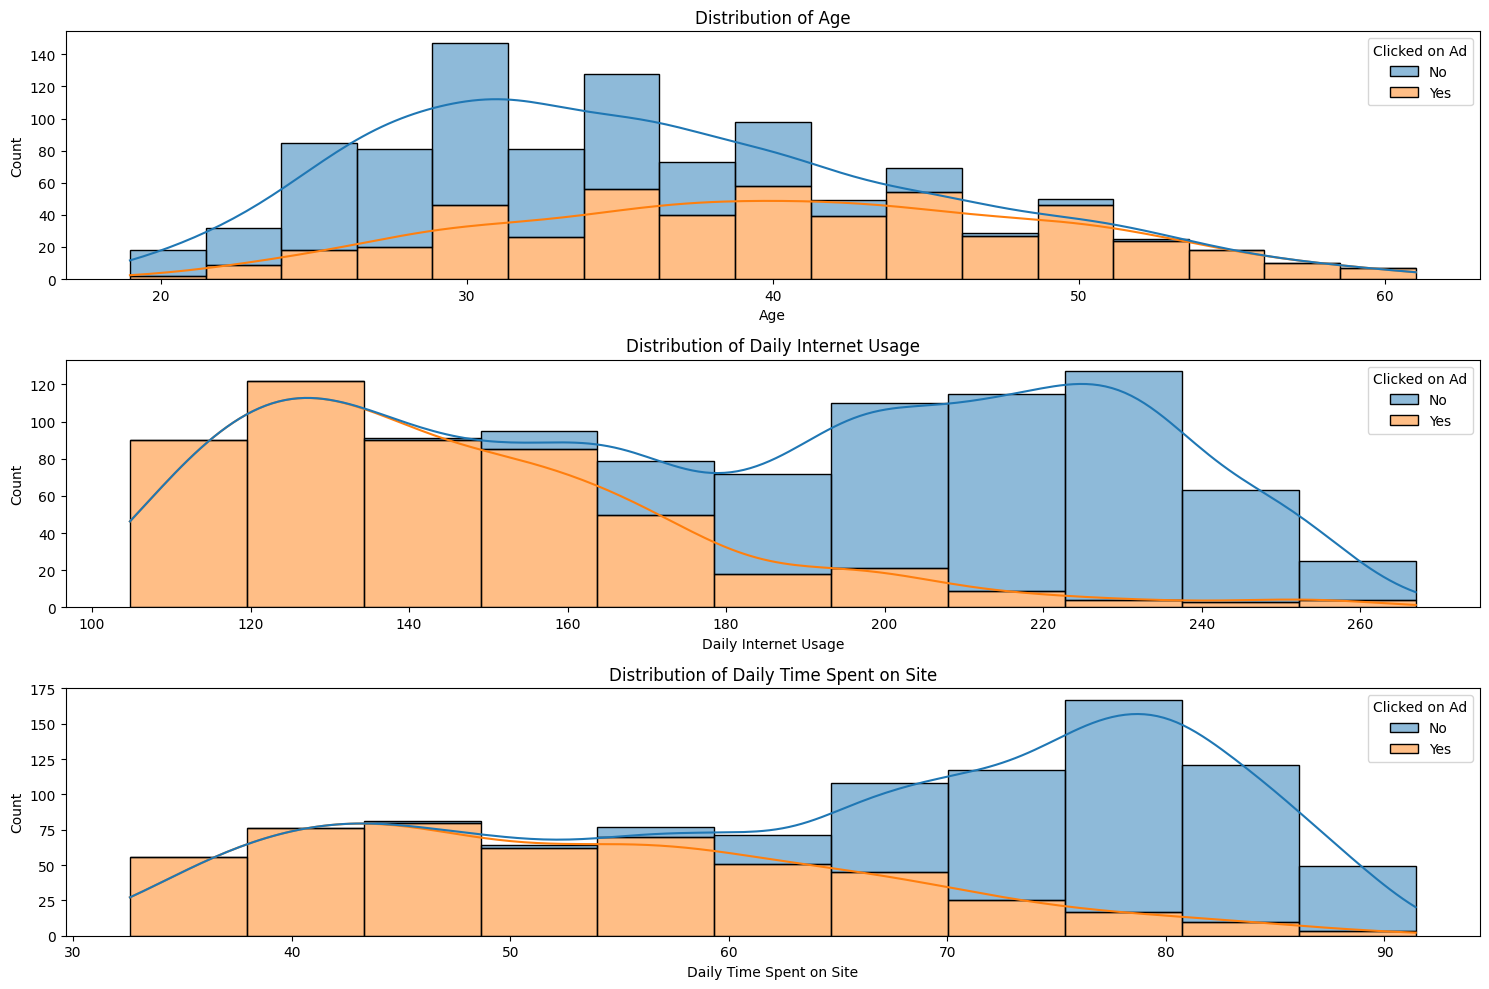

In [ ]:
# Membuat plot distribusi
plt.figure(figsize=(15, 10))

# Distribusi Age
plt.subplot(3, 1, 1)
sns.histplot(data=df, x='Age', hue='Clicked on Ad', multiple='stack', kde=True)
plt.title('Distribution of Age')

# Distribusi Daily Internet Usage
plt.subplot(3, 1, 2)
sns.histplot(data=df, x='Daily Internet Usage', hue='Clicked on Ad', multiple='stack', kde=True)
plt.title('Distribution of Daily Internet Usage')

# Distribusi Daily Time Spent on Site
plt.subplot(3, 1, 3)
sns.histplot(data=df, x='Daily Time Spent on Site', hue='Clicked on Ad', multiple='stack', kde=True)
plt.title('Distribution of Daily Time Spent on Site')

plt.tight_layout()
plt.show()

Key Takeaways:
- Mayoritas customer yang melakukan click pada iklan  adalah customer dengan usia 30 - 60 Tahun
- Customer dengan Daily Internet Usage kecil melakukan click lebih banyak dan sebaliknya.
- Customer yang menghabiskan waktu di site lebih sedikit lebih banyak melakukan click pada iklan dibandingkan customer yang lebih lama di site.

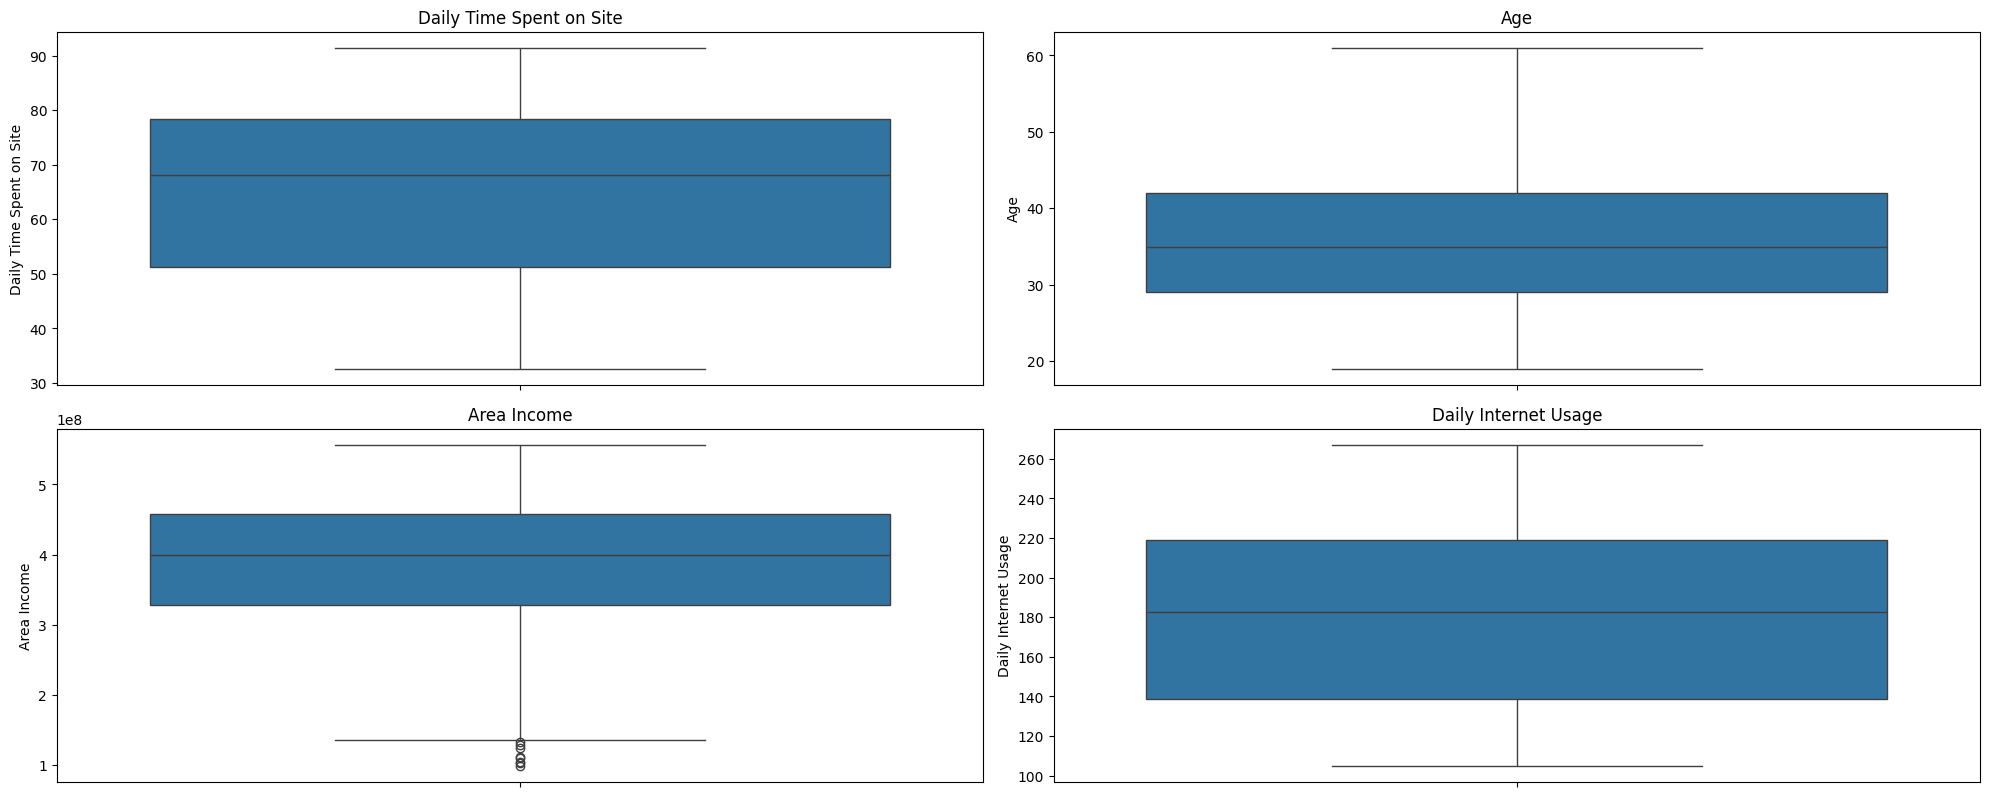

In [ ]:
# Cek outlier Feature Numeric
num = num.drop('Unnamed: 0', errors='ignore')
plt.figure(figsize=(20, 12))
for i in range(len(num)):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[num[i]], orient='v')
    plt.title(num[i])
    plt.tight_layout()

plt.show()

Key Takeaways:
- Terdapat Outlier pada feature **Area Income**

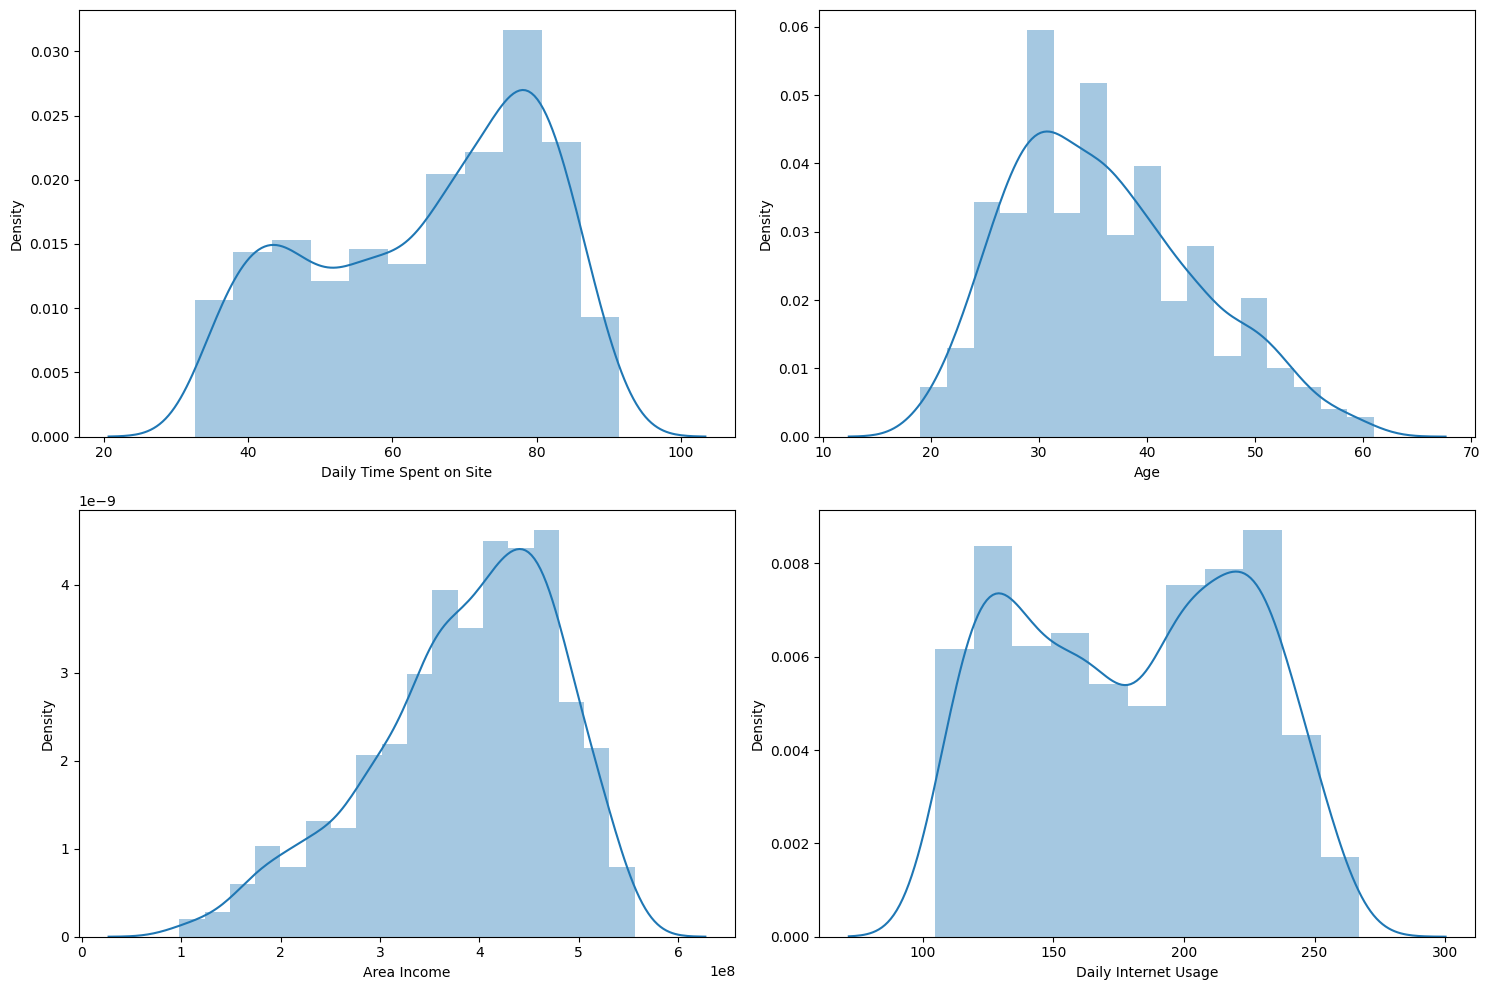

In [ ]:
# Distribusi Feature Numeric
plt.figure(figsize=(15, 10))
for i in range(0, len(num)):
    plt.subplot(2, 2, i+1)
    sns.distplot(df[num[i]])
    plt.tight_layout()

Key Takeaways:
- Feature **Daily Time Spent on Site** berdistribusi negatively skewed
- Feature **Age** berdistribusi positively skewed
- Feature **Area Income** berdistribusi negatively skewed
- Feature **Daily** Internet Usage berdistirbusi normal

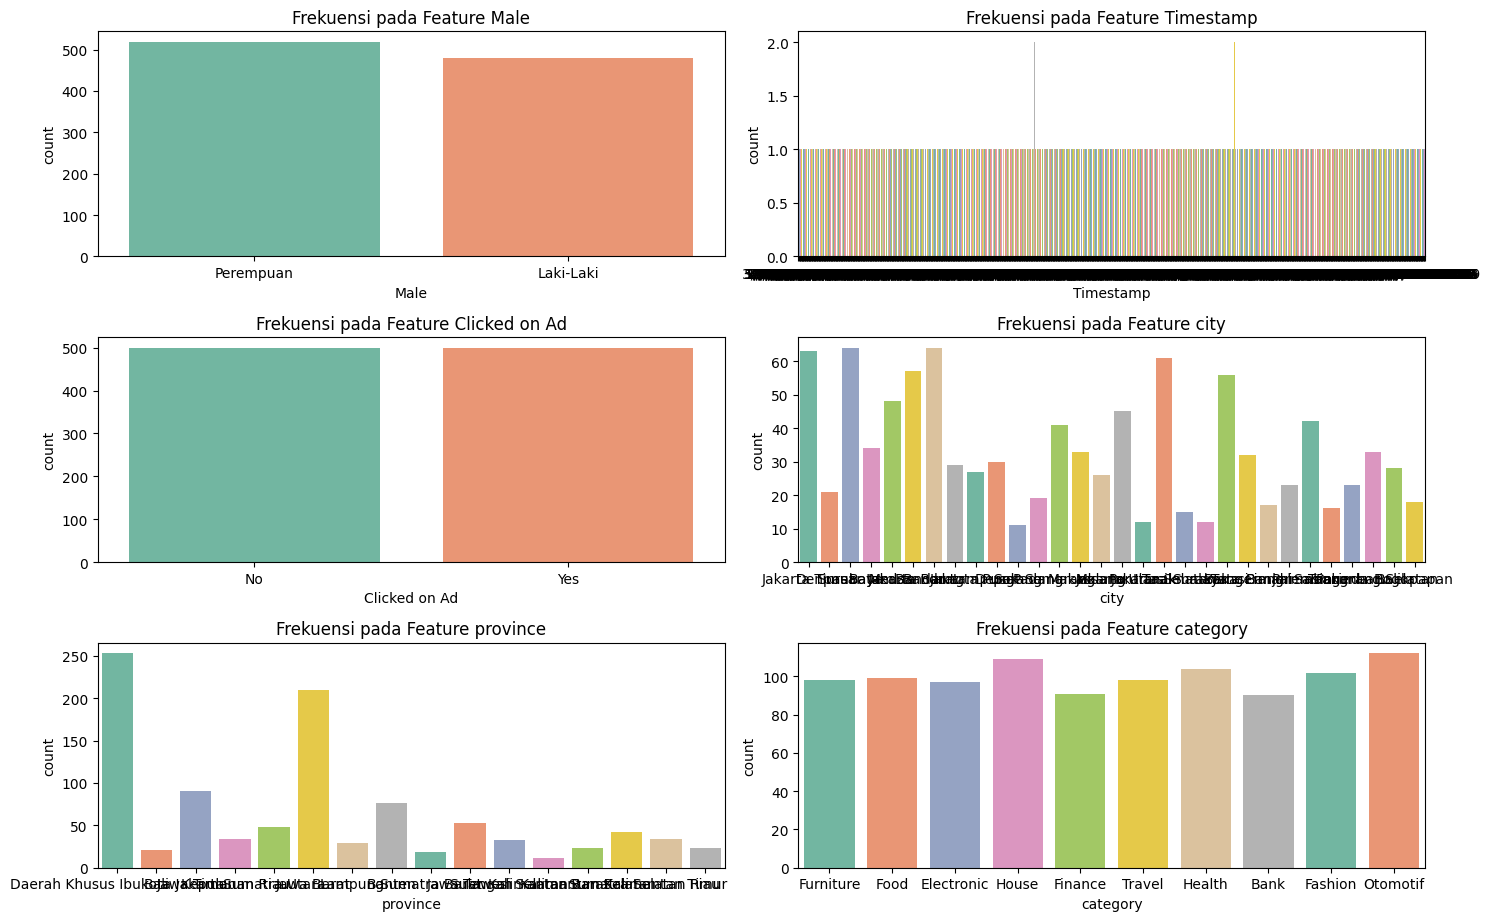

In [ ]:
# Distriusi feature kategorikal
plt.figure(figsize=(15, 15))
for i in range(len(cat)):
    plt.subplot(5, 2, i + 1)
    sns.countplot(x=df[cat[i]], palette="Set2")
    plt.title(f'Frekuensi pada Feature {cat[i]}')
    plt.tight_layout()

plt.show()

Key Takeaways:
- Perempuan lebih banyak melakukan klik iklan

- Perbedaan tipis antara customer yang melakukan klik dan tidak hamper sama banyak

- Category paling banyak diminati adalah Otomotif, House, Health, dan Fashion


# 6. Bivariate Analysis

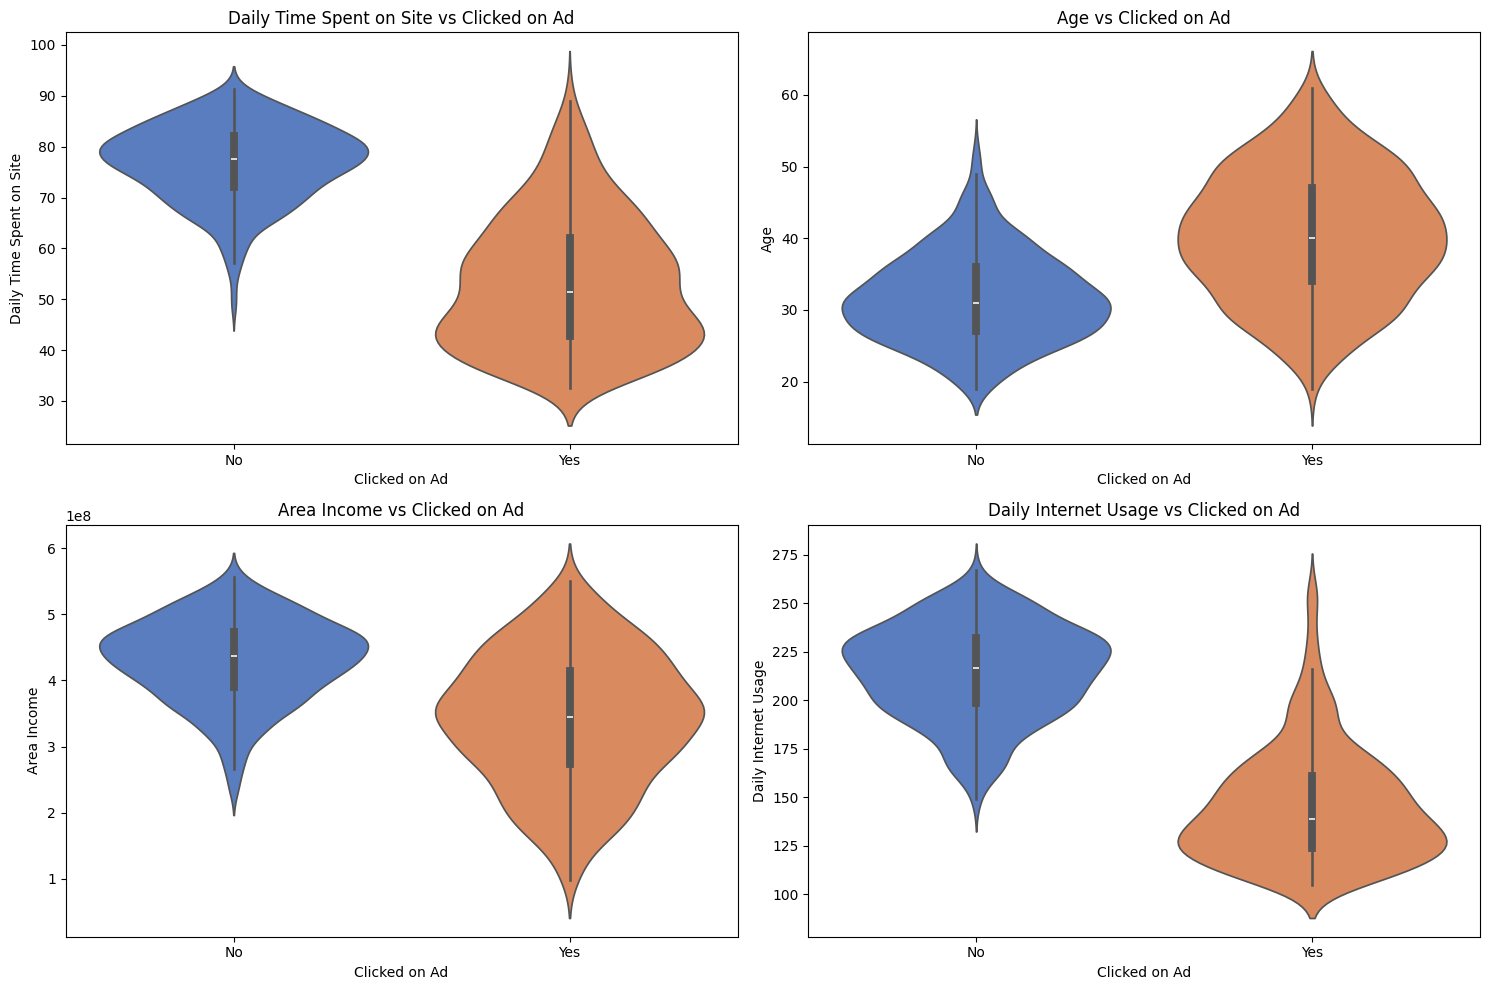

In [ ]:
# Violin Plot
plt.figure(figsize=(15, 10))

# Daily Time Spent on Site vs Clicked on Ad
plt.subplot(2, 2, 1)
sns.violinplot(data=df, x='Clicked on Ad', y='Daily Time Spent on Site', palette="muted")
plt.title('Daily Time Spent on Site vs Clicked on Ad')

# Age vs Clicked on Ad
plt.subplot(2, 2, 2)
sns.violinplot(data=df, x='Clicked on Ad', y='Age', palette="muted")
plt.title('Age vs Clicked on Ad')

# Area Income vs Clicked on Ad
plt.subplot(2, 2, 3)
sns.violinplot(data=df, x='Clicked on Ad', y='Area Income', palette="muted")
plt.title('Area Income vs Clicked on Ad')

# Daily Internet Usage vs Clicked on Ad
plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='Clicked on Ad', y='Daily Internet Usage', palette="muted")
plt.title('Daily Internet Usage vs Clicked on Ad')

plt.tight_layout()
plt.show()

Key Takeaways:

- Daily Time Spent on Site vs Clicked on Ad:
  
  Customer yang tidak mengklik iklan (No) cenderung menghabiskan lebih banyak waktu di situs, dengan distribusi yang lebih luas di bagian atas.
Pengguna yang mengklik iklan (Yes) menghabiskan waktu lebih sedikit di situs, dengan distribusi yang lebih kecil.

- Age vs Clicked on Ad:

  Tidak ada perbedaan signifikan dalam distribusi umur antara customer yang mengklik iklan dan yang tidak.

- Area Income vs Clicked on Ad:

  Customer yang tidak mengklik iklan memiliki pendapatan area yang cenderung lebih tinggi, dengan distribusi yang lebih besar di bagian atas.

- Daily Internet Usage vs Clicked on Ad:

  Customer yang tidak mengklik iklan cenderung memiliki penggunaan internet harian yang lebih tinggi, dengan distribusi yang lebih besar.

# 7. Multivariate Analysis

In [ ]:
# Menghitung korelasi antar kolom numerik
correlation_matrix = df[num].corr()
print(correlation_matrix)

                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331424     0.308266   
Age                                      -0.331424  1.000000    -0.179343   
Area Income                               0.308266 -0.179343     1.000000   
Daily Internet Usage                      0.518294 -0.370481     0.338080   

                          Daily Internet Usage  
Daily Time Spent on Site              0.518294  
Age                                  -0.370481  
Area Income                           0.338080  
Daily Internet Usage                  1.000000  


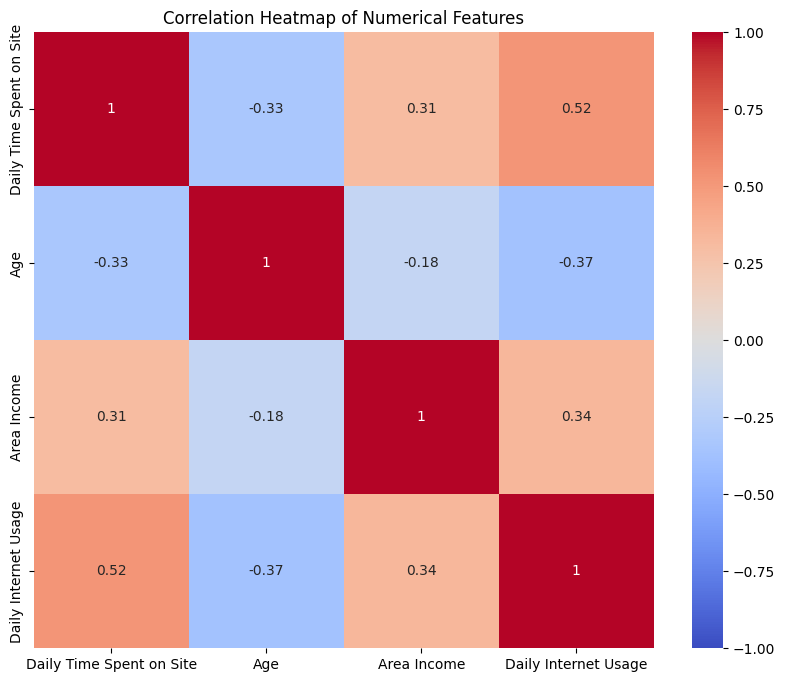

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Key Takeaways:
- **Daily Time Spent on Site** memiliki korelasi positif yang cukup kuat dengan **Daily Internet Usage** (0.51), menunjukkan bahwa semakin lama seseorang menghabiskan waktu di internet, semakin lama mereka menghabiskan waktu di situs.

- **Age** memiliki korelasi negatif dengan **Daily Time Spent on Site** (-0.33) dan **Daily Internet Usage** (-0.37), menunjukkan bahwa pengguna yang lebih tua cenderung menghabiskan lebih sedikit waktu di situs dan internet secara keseluruhan.

- **Area Income** memiliki korelasi positif sedang dengan **Daily Time Spent on Site** (0.30) dan **Daily Internet Usage** (0.33), menunjukkan bahwa pengguna dari area dengan pendapatan lebih tinggi cenderung menghabiskan lebih banyak waktu di situs dan internet.

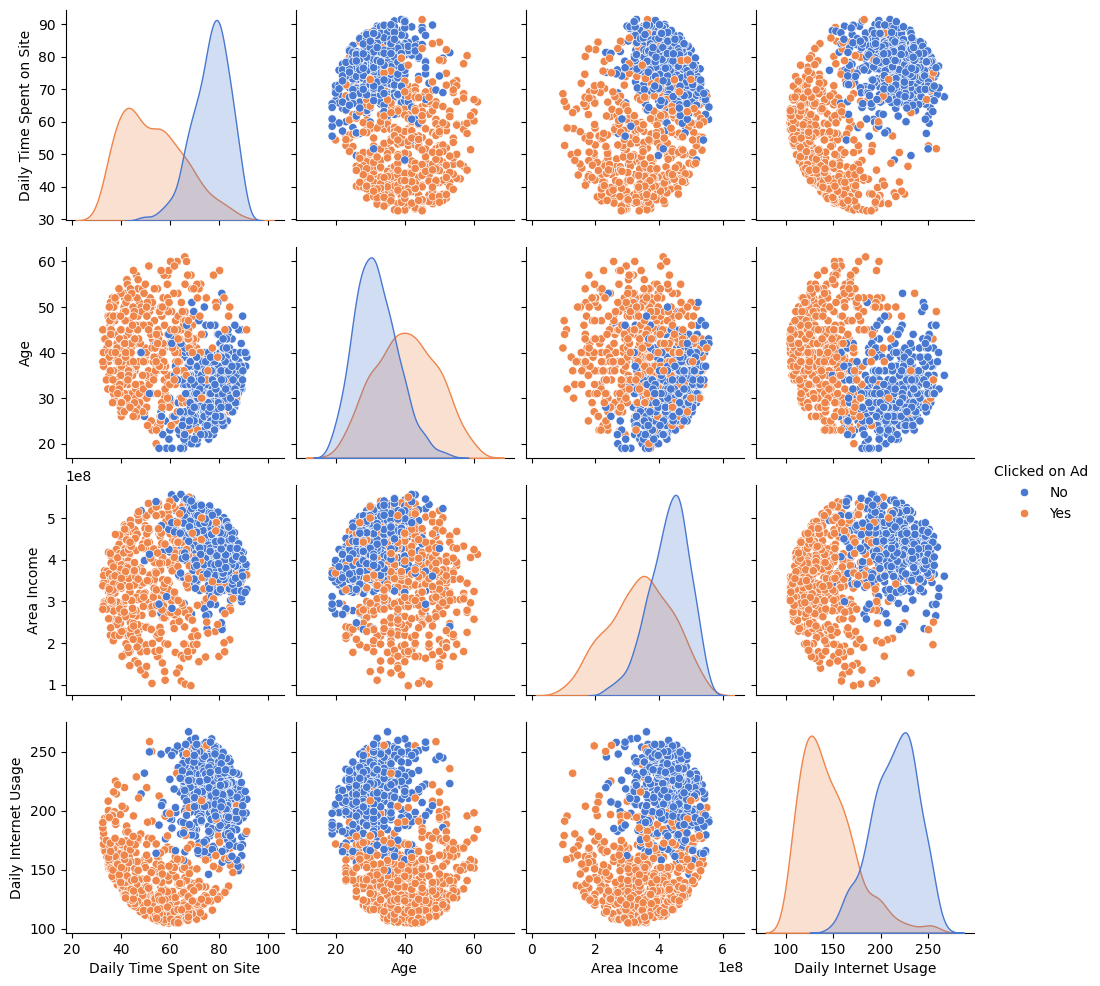

In [ ]:
# Membuat Pairplot
df_plot = df[num].copy()
df_plot['Clicked on Ad'] = df['Clicked on Ad']
sns.pairplot(df_plot, hue='Clicked on Ad', palette="muted")
plt.show()

# 8. Data Cleansing

## a. Handling Null Value

In [ ]:
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

Key Takeaways:
- Terdapa null value pada feature **Daily Time Spent on Site**, **Area Income**, **Daily Internet Usage** dan **Male**

Action :
- Mengisi null value dengan nilai Mean pada feature **Daily Time Spent on Site**, **Area Income**, dan **Daily Internet Usage**.
- Mengisi null value dengan nilai Mode pada feature **Male**

In [ ]:
# Mengisi null value
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace=True)
df['Male'].fillna(df['Male'].mode()[0], inplace=True)

## b. Handling Duplicated Data

In [ ]:
# Cek Duplikat data
df.duplicated().any()

False

Key Takeaways:
- Tidak terdapat data duplikat

## c. Change Data Type

In [ ]:
# Mengubah feature 'Timestamp' menjadi format datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

## d. Rename Feature

In [ ]:
# Ganti nama feature 'Male' menjadi 'Gender'
df.rename(columns={'Male': 'Gender'}, inplace=True)

## e. Handling Outlier

In [ ]:
# Menghitung IQR
Q1 = df[num].quantile(0.25)
Q3 = df[num].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring outlier
df_no_outliers = df[~((df[num] < lower_bound) | (df[num] > upper_bound)).any(axis=1)]

print(f"Data sebelum menghapus outlier: {df.shape[0]}")
print(f"Data setelah menghapus outlier: {df_no_outliers.shape[0]}")


Data sebelum menghapus outlier: 1000
Data setelah menghapus outlier: 991


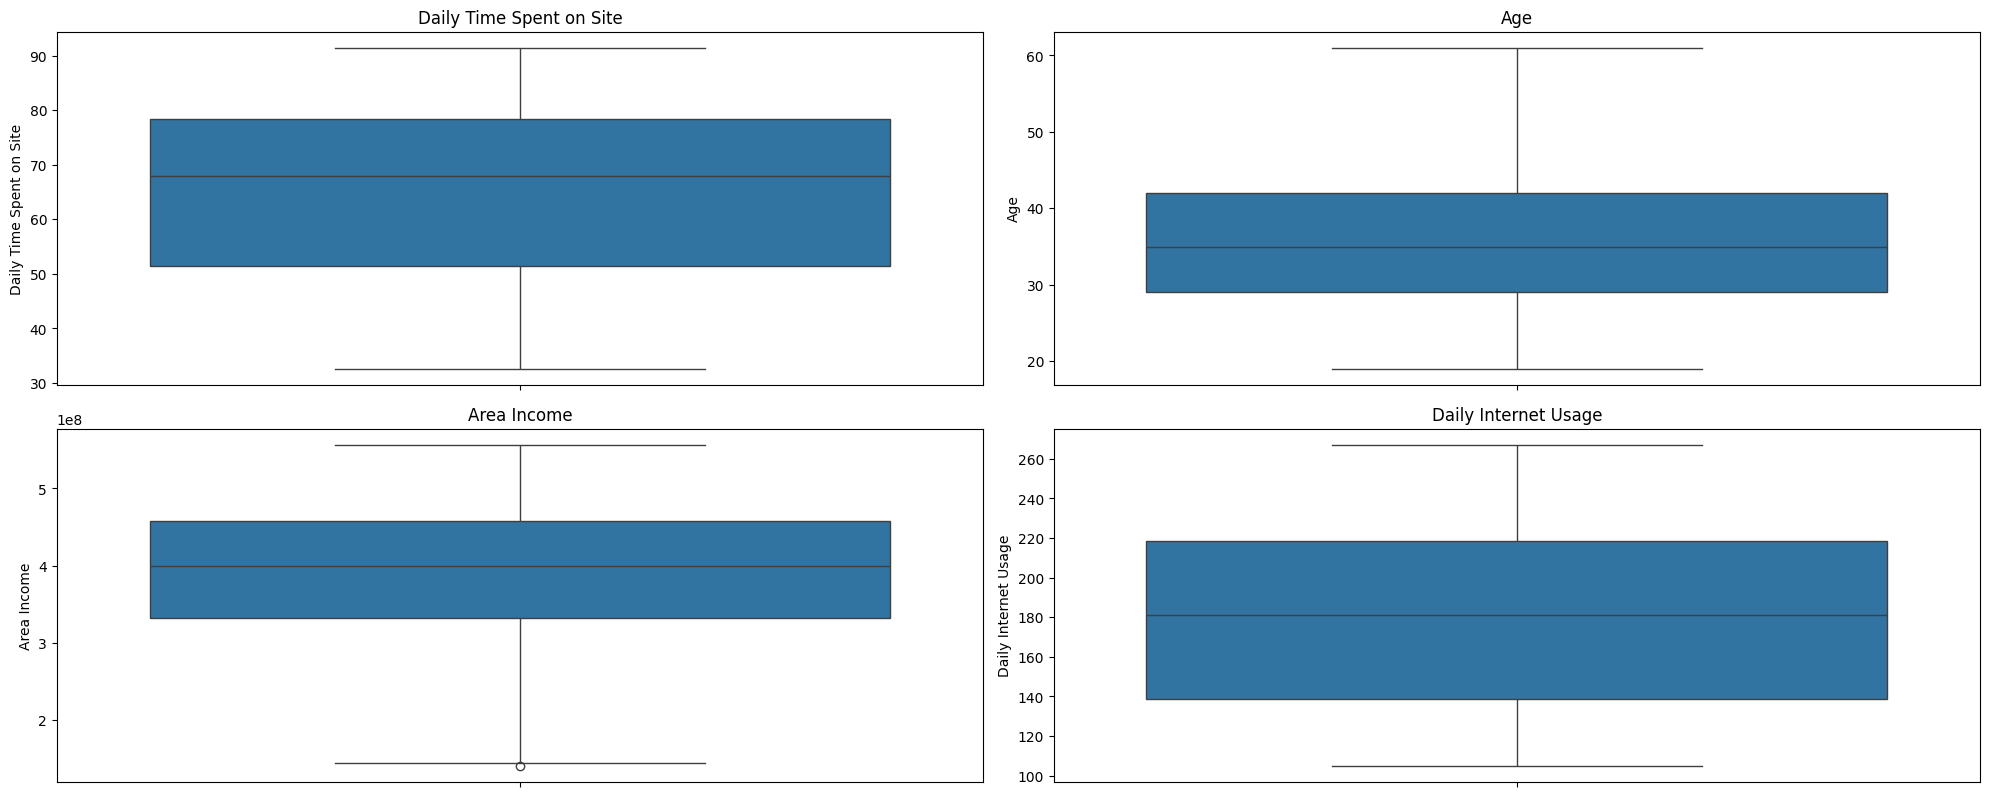

In [ ]:
# Cek outlier setelah di filter
num = num.drop('Unnamed: 0', errors='ignore')
plt.figure(figsize=(20, 12))
for i in range(len(num)):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df_no_outliers[num[i]], orient='v')
    plt.title(num[i])
    plt.tight_layout()

plt.show()

# 9. Data Preprocessing

In [ ]:
df2 = df_no_outliers.copy()

In [ ]:
# Pengelompokkan Feature
num = df2.select_dtypes(include=['float64', 'int64']).columns
cat = df2.select_dtypes(include=['object']).columns
date = df2.select_dtypes(include=['datetime64[ns]']).columns

## Feature Extraction

In [ ]:
# Extract Feature Datetime
df_datetime = df2.copy()

# Mengekstrak tahun, bulan, hari dalam seminggu, dan jam dari feature Timestamp
df_datetime['Year'] = df_datetime['Timestamp'].dt.year
df_datetime['Month'] = df_datetime['Timestamp'].dt.month
df_datetime['Week'] = df_datetime['Timestamp'].dt.isocalendar().week
df_datetime['Day'] = df_datetime['Timestamp'].dt.day

In [ ]:
# Ubah tipe data Feature Week
df_datetime['Week'] = df_datetime['Week'].astype(int)

In [ ]:
df_datetime.sample((3))

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
75,75,64.10,22,423260040.0,215.93,Perempuan,2016-04-01 16:21:00,No,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Food,2016,4,13,1
960,960,56.78,28,279575730.0,124.32,Perempuan,2016-06-19 23:04:00,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Health,2016,6,24,19
241,241,53.68,47,393266510.0,115.26,Laki-Laki,2016-02-16 09:11:00,Yes,Bandung,Jawa Barat,Fashion,2016,2,7,16


## Feature Encoding

In [ ]:
df3 = df_datetime.copy()

In [ ]:
# Pengelompokkan Feature
num = df3.select_dtypes(include=['float64', 'int64']).columns
cat = df3.select_dtypes(include=['object']).columns
date = df3.select_dtypes(include=['datetime64[ns]']).columns

### Label Encoding

In [ ]:
print(df3['Clicked on Ad'].unique())

['No' 'Yes']


In [ ]:
print(df3['Gender'].unique())

['Perempuan' 'Laki-Laki']


In [ ]:
# Label Encoding Feature Clicked on Ad
df3['Clicked on Ad'] = np.where(df3['Clicked on Ad'] == 'Yes', 1, 0)
df3['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    491
Name: count, dtype: int64

In [ ]:
# Label Encoding Feature Gender
df3['Gender'] = np.where(df3['Gender'] == 'Laki-Laki', 1, 0)
df3['Gender'].value_counts()

Gender
0    518
1    473
Name: count, dtype: int64

In [ ]:
df3.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
324,324,84.33,41,384929510.0,240.95,0,2016-03-16 00:28:00,0,Bandung,Jawa Barat,Electronic,2016,3,11,16
252,252,84.54,33,454317290.0,204.02,1,2016-03-02 10:07:00,0,Tangerang,Banten,House,2016,3,9,2
553,553,44.73,35,387218790.0,127.56,1,2016-01-27 18:25:00,1,Cimahi,Jawa Barat,Travel,2016,1,4,27
428,428,60.53,29,397316360.0,123.28,0,2016-05-09 10:21:00,1,Tangerang Selatan,Banten,Electronic,2016,5,19,9
403,403,87.23,29,357105770.0,202.12,0,2016-03-26 19:54:00,0,Palembang,Sumatra Selatan,Otomotif,2016,3,12,26


### One-Hot Encoding

In [ ]:
df3[cat].nunique()

Gender            2
Clicked on Ad     2
city             30
province         16
category         10
dtype: int64

Action:
- Berdasarkan total unique value pada feature kategorikal, diputuskan hanya melakukan encoding pada feature **Category**

In [ ]:
df3_encoded = pd.get_dummies(df3, columns=['category'])
df3_encoded.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,...,False,False,False,False,False,True,False,False,False,False
1,1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,...,False,False,False,False,True,False,False,False,False,False
2,2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,...,False,True,False,False,False,False,False,False,False,False
3,3,74.15,29,383643260.0,245.89,1,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,...,False,False,False,False,False,False,False,True,False,False
4,4,68.37,35,517229930.0,225.58,0,2016-06-03 03:36:00,0,Medan,Sumatra Utara,...,False,False,False,True,False,False,False,False,False,False


## Feature Selection

In [ ]:
df3_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                991 non-null    int64         
 1   Daily Time Spent on Site  991 non-null    float64       
 2   Age                       991 non-null    int64         
 3   Area Income               991 non-null    float64       
 4   Daily Internet Usage      991 non-null    float64       
 5   Gender                    991 non-null    int64         
 6   Timestamp                 991 non-null    datetime64[ns]
 7   Clicked on Ad             991 non-null    int64         
 8   city                      991 non-null    object        
 9   province                  991 non-null    object        
 10  Year                      991 non-null    int32         
 11  Month                     991 non-null    int32         
 12  Week                      9

Action:

Menghapus Feature yang tidak diperlukan untuk modelling.
- Menghapus Feature **Unamed: 0**
- Menghapus Feature **TimeStamp**
- Menghapus Feature **City**
- Menghapus Feature **Province**
- Menghapus Feature **Year**

In [ ]:
# Removing Feature
df3_encoded = df3_encoded.drop(columns=['Unnamed: 0', 'Timestamp', 'city', 'province', 'Year'])
print(df3_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  991 non-null    float64
 1   Age                       991 non-null    int64  
 2   Area Income               991 non-null    float64
 3   Daily Internet Usage      991 non-null    float64
 4   Gender                    991 non-null    int64  
 5   Clicked on Ad             991 non-null    int64  
 6   Month                     991 non-null    int32  
 7   Week                      991 non-null    int64  
 8   Day                       991 non-null    int32  
 9   category_Bank             991 non-null    bool   
 10  category_Electronic       991 non-null    bool   
 11  category_Fashion          991 non-null    bool   
 12  category_Finance          991 non-null    bool   
 13  category_Food             991 non-null    bool   
 14  category_Furnit

In [ ]:
df3_encoded = df3_encoded.astype(int)

In [ ]:
df3_encoded.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Month,Week,Day,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
982,54,38,505374030,140,0,1,6,25,25,0,0,0,0,0,0,0,0,1,0
745,57,50,437262700,124,0,1,2,6,12,0,0,0,0,1,0,0,0,0,0
208,59,58,273928480,140,0,1,6,24,16,0,0,0,0,0,1,0,0,0,0
586,78,38,404914720,252,0,0,1,1,5,0,0,0,0,0,1,0,0,0,0
225,78,30,374091830,133,0,1,2,6,10,0,0,0,0,0,0,0,0,1,0
565,79,26,432235860,185,1,0,1,1,8,1,0,0,0,0,0,0,0,0,0
480,57,22,417743480,207,1,0,6,23,7,0,0,1,0,0,0,0,0,0,0
656,85,31,384864670,182,0,0,6,24,17,0,0,0,0,0,0,0,1,0,0
83,68,54,215083820,138,0,1,4,16,19,0,0,0,0,0,0,0,1,0,0
383,74,26,363827870,235,1,0,7,27,5,0,0,0,0,0,0,1,0,0,0


# 10. Splitting Dataset

In [ ]:
df_clean = df3_encoded.copy()

In [ ]:
# Memisahkan fitur dan target
X = df_clean.drop(columns=['Clicked on Ad'])
y = df_clean['Clicked on Ad']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(f'Train set 1 size: {X1_train.shape[0]}')
print(f'Test set 1 size: {X1_test.shape[0]}')

# Normalisasi data
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X1_train_norm, X1_test_norm, y1_train_norm, y1_test_norm = train_test_split(X_normalized, y, test_size=0.30, random_state=42)
print(f'Train set 1 (normalized) size: {X1_train_norm.shape[0]}')
print(f'Test set 1 (normalized) size: {X1_test_norm.shape[0]}')

# Standarisasi data
scaler_standard = StandardScaler()
X_standardized = pd.DataFrame(scaler_standard.fit_transform(X), columns=X.columns)

X1_train_standard, X1_test_standard, y1_train_standard, y1_test_standard = train_test_split(X_standardized, y, test_size=0.30, random_state=42)
print(f'Train set 1 (standardized) size: {X1_train_standard.shape[0]}')
print(f'Test set 1 (standardized) size: {X1_test_standard.shape[0]}')

Train set 1 size: 693
Test set 1 size: 298
Train set 1 (normalized) size: 693
Test set 1 (normalized) size: 298
Train set 1 (standardized) size: 693
Test set 1 (standardized) size: 298


In [ ]:
X1_train.describe()

In [ ]:
X1_train_norm.describe()

In [ ]:
X1_train_standard.describe()

Berdasarkan statisitc descriptive data train, diputuskan akan melakukan pengujian pada data dengan kriteria:
- Data original, untuk membandingkan hasil analisis dengan data yang sudah di transformasi
- Data yang di standarisasi

# 11. Modelling

## Function Definition

In [ ]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    # Training accuracy
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)

    # Test accuracy
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)

    # Test precision, recall, F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_pred, average='binary')

    # ROC AUC
    test_proba = model.predict_proba(X_test)[:, 1]
    train_proba = model.predict_proba(X_train)[:, 1]
    roc_auc_test = roc_auc_score(y_test, test_proba)
    roc_auc_train = roc_auc_score(y_train, train_proba)

    # Cross-validation accuracy
    crossval_train = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    crossval_test = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy').mean()

    print(f"Accuracy (Test Set): {test_accuracy:.2f}")
    print(f"Accuracy (Train Set): {train_accuracy:.2f}")
    print(f"Precision (Test Set): {precision:.2f}")
    print(f"Recall (Test Set): {recall:.2f}")
    print(f"F1-Score (Test Set): {f1:.2f}")
    print(f"roc_auc (test-proba): {roc_auc_test:.2f}")
    print(f"roc_auc (train-proba): {roc_auc_train:.2f}")
    print(f"Accuracy (crossval train): {crossval_train:.2f}")
    print(f"Accuracy (crossval test): {crossval_test:.2f}")

def plot_confusion_matrix(model, X_test, y_test):
    test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, test_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False,
                xticklabels=['No Click', 'Click'], yticklabels=['No Click', 'Click'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def plot_learning_curve(model, X_train, y_train, cv=5, scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel(scoring.capitalize())
    plt.legend(loc='best')
    plt.grid()
    plt.show()

## A. Modelling Data Original

### 1. Logistic Regression

Accuracy (Test Set): 0.52
Accuracy (Train Set): 0.50
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.71
roc_auc (train-proba): 0.79
Accuracy (crossval train): 0.50
Accuracy (crossval test): 0.52


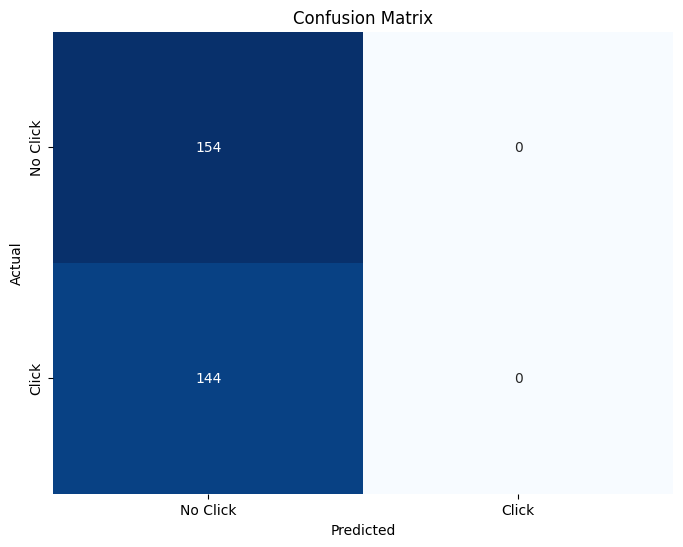

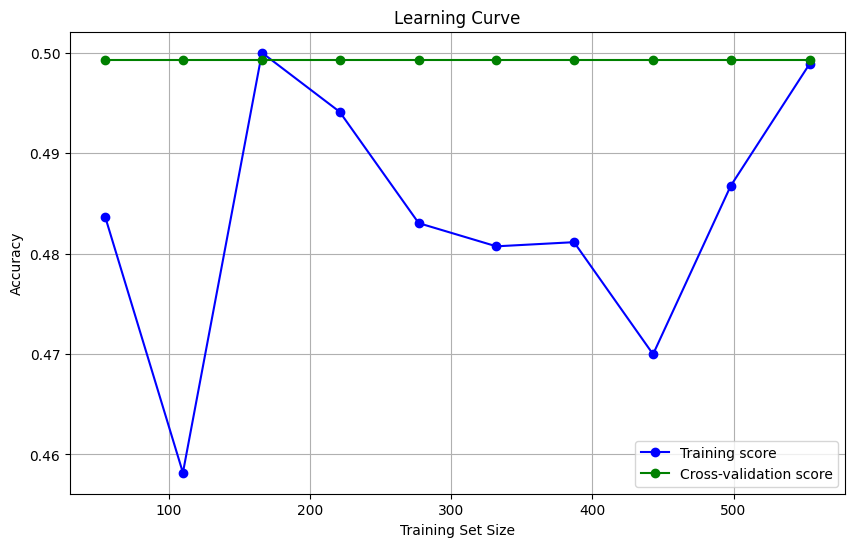

In [ ]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X1_train, y1_train)

eval_classification(logreg, X1_train, y1_train, X1_test, y1_test)
plot_confusion_matrix(logreg, X1_test, y1_test)
plot_learning_curve(logreg, X1_train, y1_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters found:  {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.96
Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.97
Precision (Test Set): 0.97
Recall (Test Set): 0.97
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.96
Accuracy (crossval test): 0.96


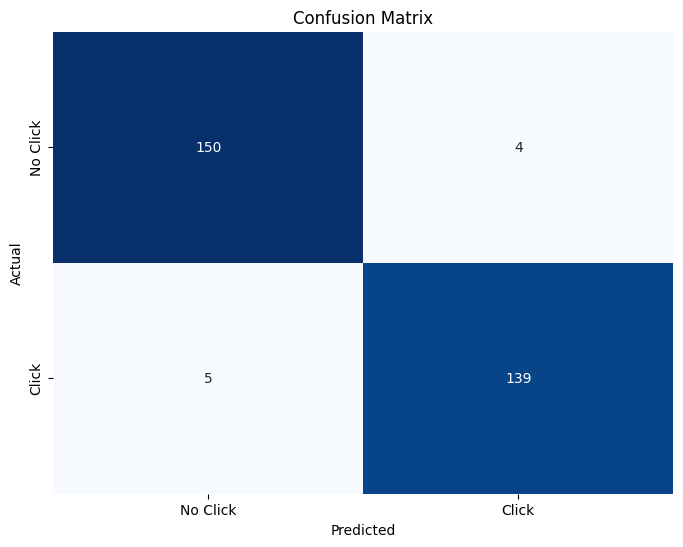

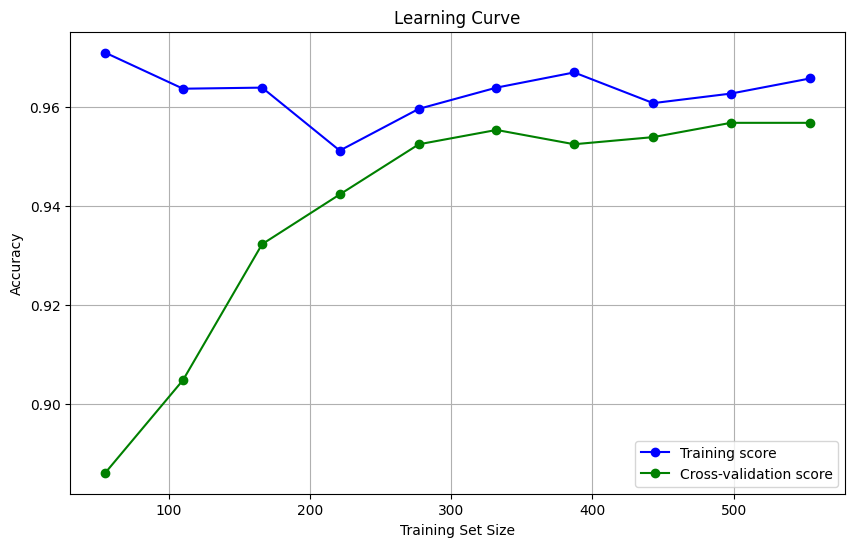

In [ ]:
# Hyperparameter Tunning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

logreg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X1_train, y1_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_logreg = grid_search.best_estimator_
eval_classification(best_logreg, X1_train, y1_train, X1_test, y1_test)
plot_confusion_matrix(best_logreg, X1_test, y1_test)
plot_learning_curve(best_logreg, X1_train, y1_train)


### 2. Decision Tree

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Precision (Test Set): 0.93
Recall (Test Set): 0.94
F1-Score (Test Set): 0.93
roc_auc (test-proba): 0.94
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.93
Accuracy (crossval test): 0.91


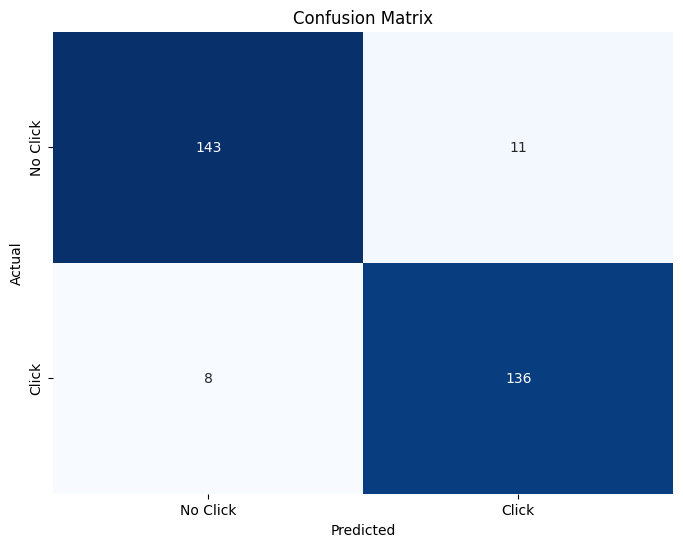

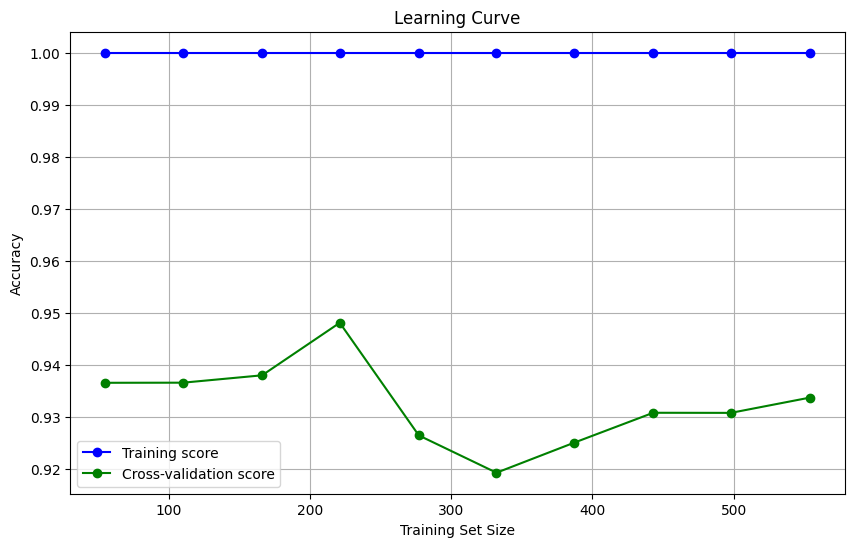

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X1_train, y1_train)

eval_classification(tree, X1_train, y1_train, X1_test, y1_test)
plot_confusion_matrix(tree, X1_test, y1_test)
plot_learning_curve(tree, X1_train, y1_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Best cross-validation score: 0.94
Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.97
Precision (Test Set): 0.94
Recall (Test Set): 0.96
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.94
Accuracy (crossval test): 0.92


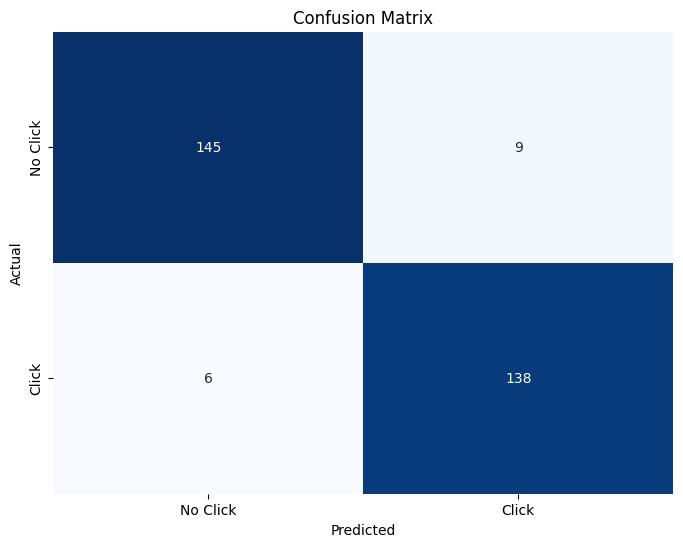

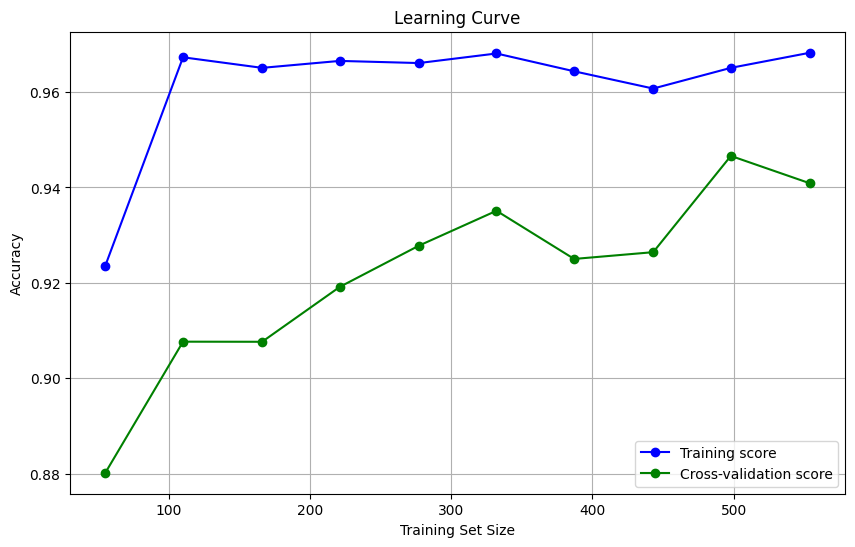

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X1_train, y1_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_tree = grid_search.best_estimator_
eval_classification(best_tree, X1_train, y1_train, X1_test, y1_test)
plot_confusion_matrix(best_tree, X1_test, y1_test)
plot_learning_curve(best_tree, X1_train, y1_train)


### 3. Random Forest

Accuracy (Test Set): 0.98
Accuracy (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Test Set): 0.97
F1-Score (Test Set): 0.98
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.96
Accuracy (crossval test): 0.96


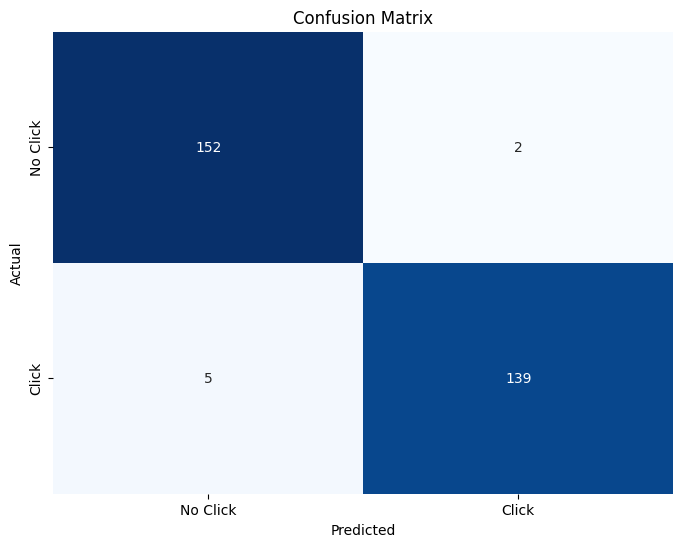

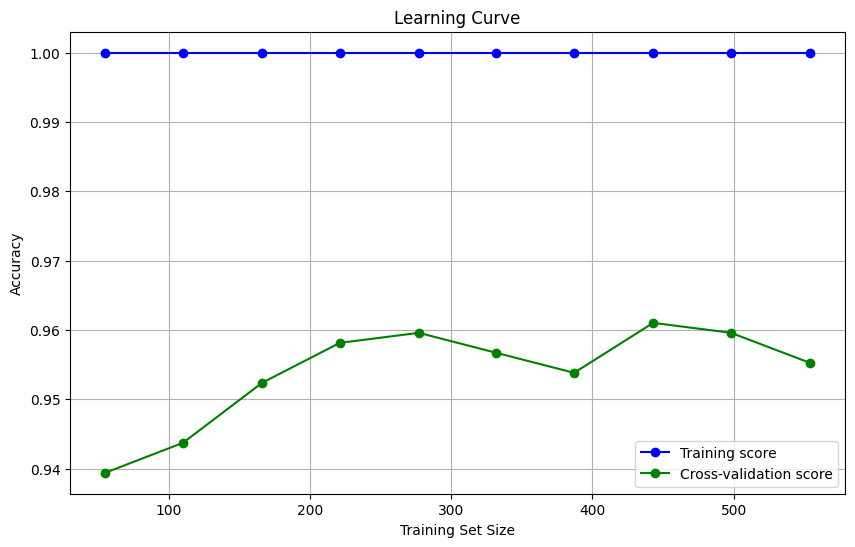

In [ ]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X1_train, y1_train)

eval_classification(forest, X1_train, y1_train, X1_test, y1_test)
plot_confusion_matrix(forest, X1_test, y1_test)
plot_learning_curve(forest, X1_train, y1_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.96
Accuracy (Test Set): 0.98
Accuracy (Train Set): 0.99
Precision (Test Set): 0.98
Recall (Test Set): 0.97
F1-Score (Test Set): 0.98
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.96
Accuracy (crossval test): 0.96


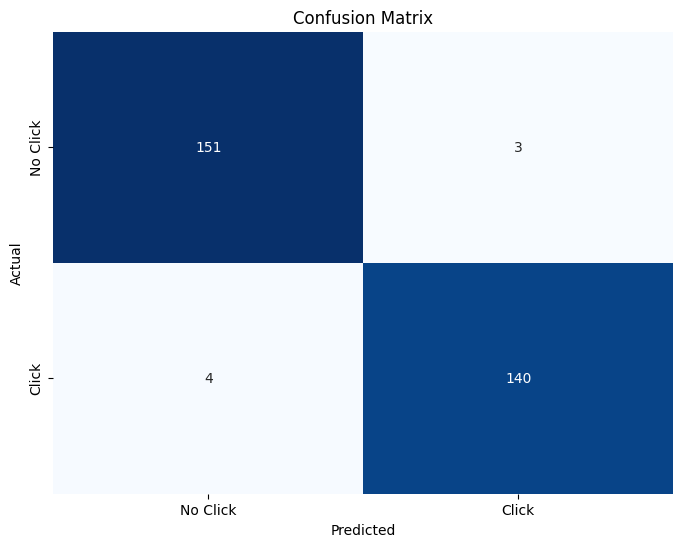

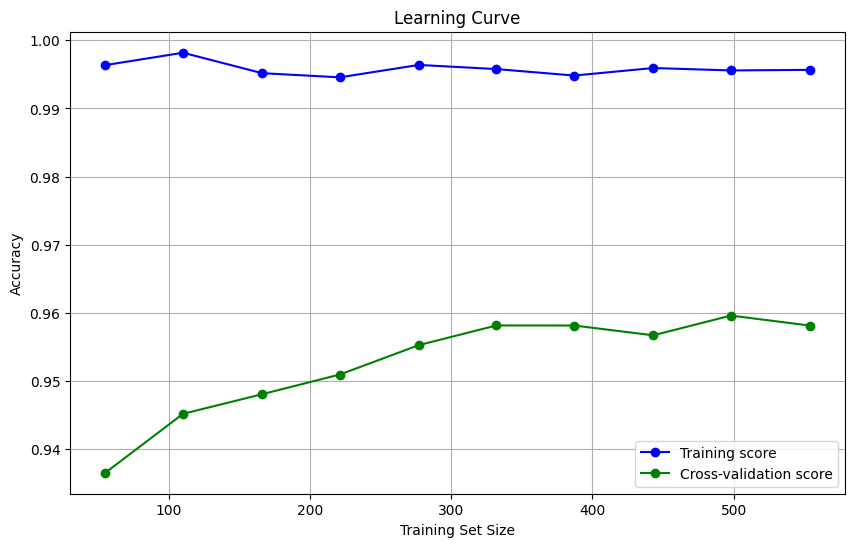

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

forest = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X1_train, y1_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_forest = grid_search.best_estimator_
eval_classification(best_forest, X1_train, y1_train, X1_test, y1_test)
plot_confusion_matrix(best_forest, X1_test, y1_test)
plot_learning_curve(best_forest, X1_train, y1_train)


### 4. KNN

Accuracy (Test Set): 0.66
Accuracy (Train Set): 0.77
Precision (Test Set): 0.68
Recall (Test Set): 0.56
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.68
roc_auc (train-proba): 0.86
Accuracy (crossval train): 0.67
Accuracy (crossval test): 0.65


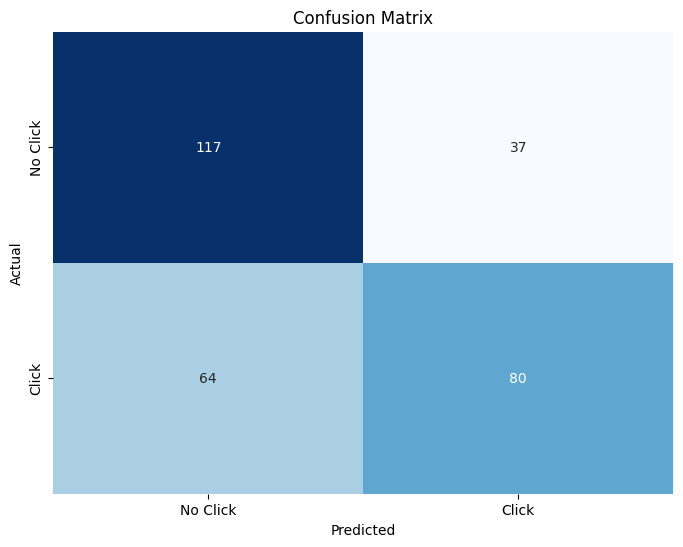

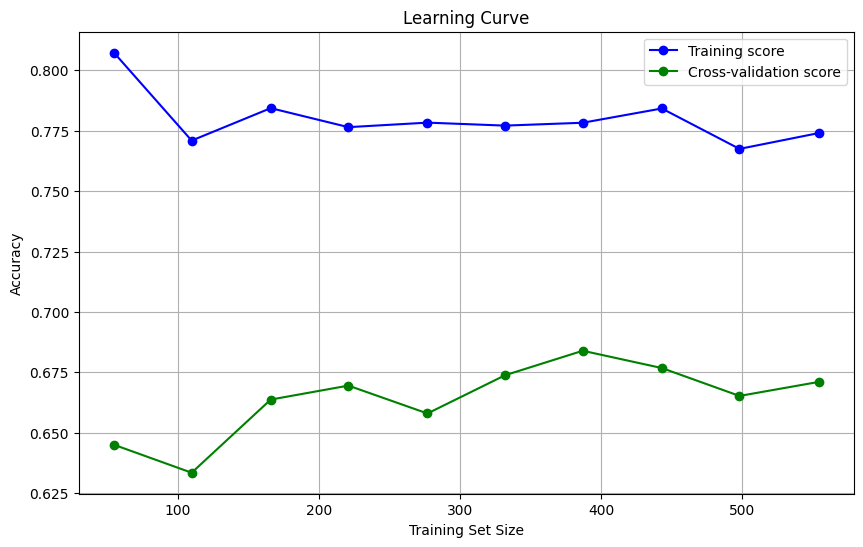

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X1_train, y1_train)

eval_classification(knn, X1_train, y1_train, X1_test, y1_test)
plot_confusion_matrix(knn, X1_test, y1_test)
plot_learning_curve(knn, X1_train, y1_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
Best parameters found:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 13, 'weights': 'uniform'}
Best cross-validation score: 0.72
Accuracy (Test Set): 0.69
Accuracy (Train Set): 0.75
Precision (Test Set): 0.74
Recall (Test Set): 0.55
F1-Score (Test Set): 0.63
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.82
Accuracy (crossval train): 0.72
Accuracy (crossval test): 0.65


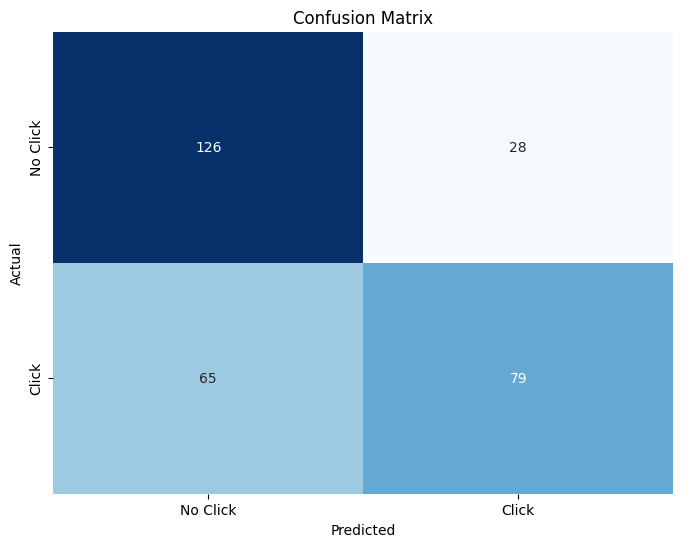

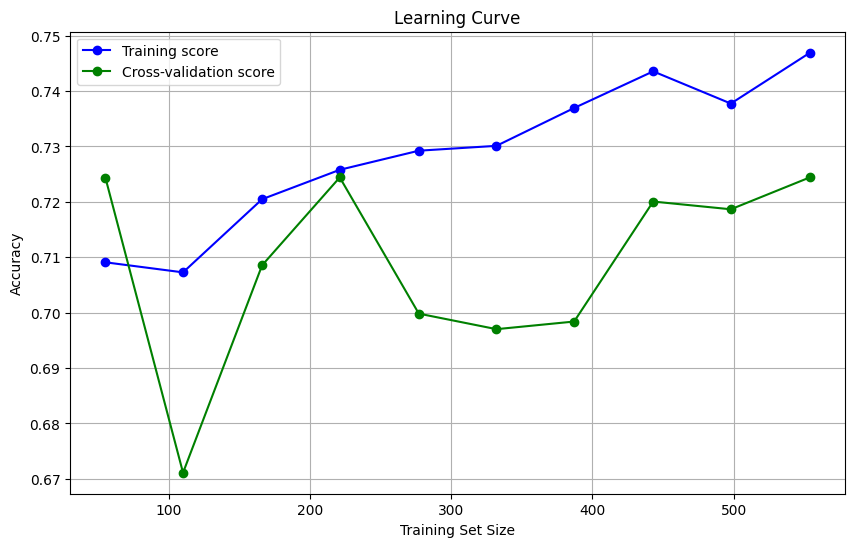

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50]
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X1_train, y1_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_knn = grid_search.best_estimator_
eval_classification(best_knn, X1_train, y1_train, X1_test, y1_test)
plot_confusion_matrix(best_knn, X1_test, y1_test)
plot_learning_curve(best_knn, X1_train, y1_train)


### 5. Gradient Boosting

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Test Set): 0.97
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.96
Accuracy (crossval test): 0.95


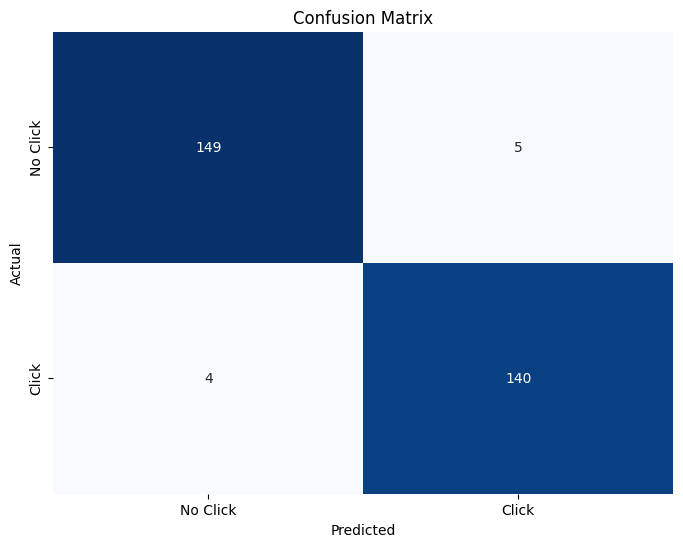

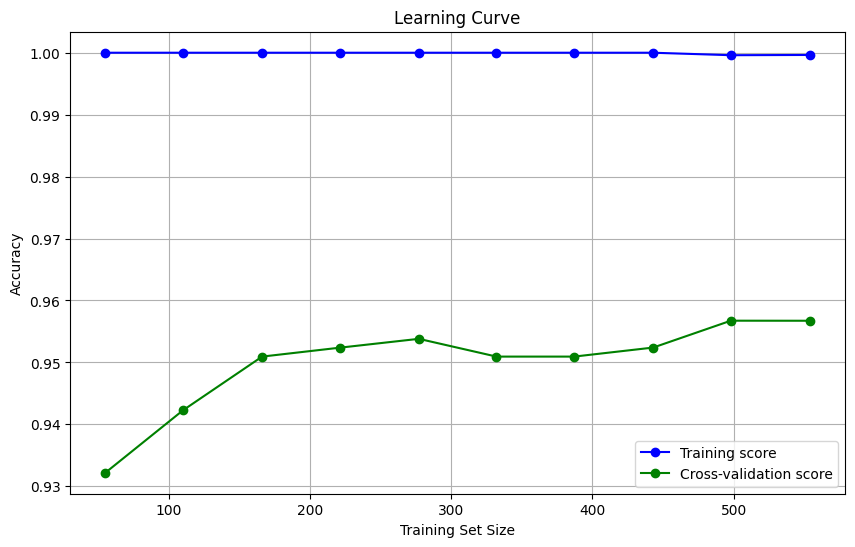

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X1_train, y1_train)

eval_classification(gb, X1_train, y1_train, X1_test, y1_test)
plot_confusion_matrix(gb, X1_test, y1_test)
plot_learning_curve(gb, X1_train, y1_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score: 0.96
Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.98
Recall (Test Set): 0.96
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.96
Accuracy (crossval test): 0.96


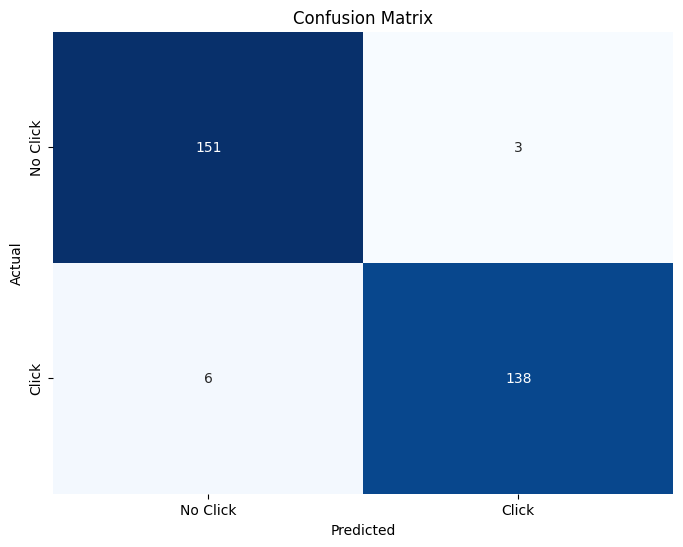

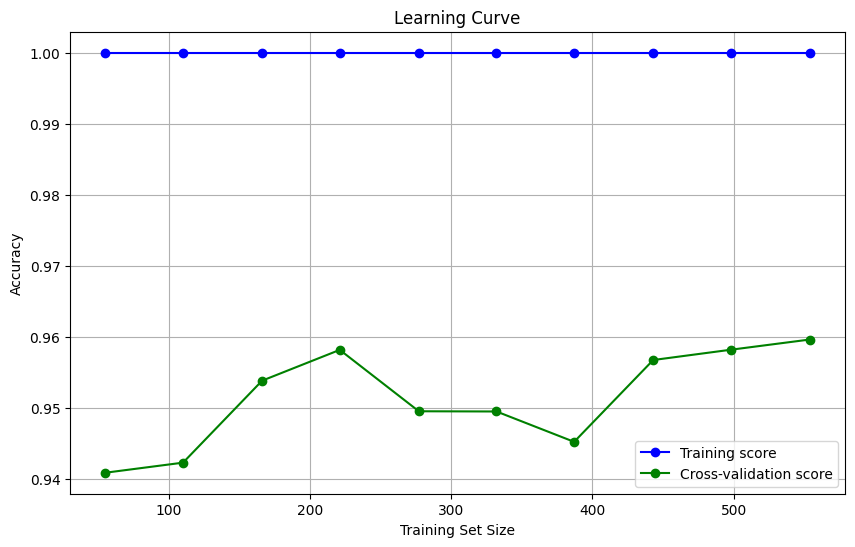

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X1_train, y1_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_gb = grid_search.best_estimator_
eval_classification(best_gb, X1_train, y1_train, X1_test, y1_test)
plot_confusion_matrix(best_gb, X1_test, y1_test)
plot_learning_curve(best_gb, X1_train, y1_train)


## B. Modelling Data Standardization

### 1. Logistic Regression

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.97
Precision (Test Set): 0.97
Recall (Test Set): 0.97
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.96
Accuracy (crossval test): 0.97


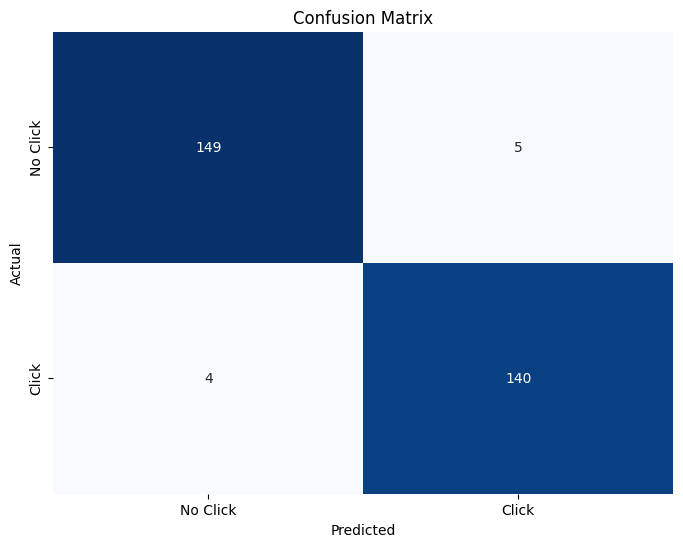

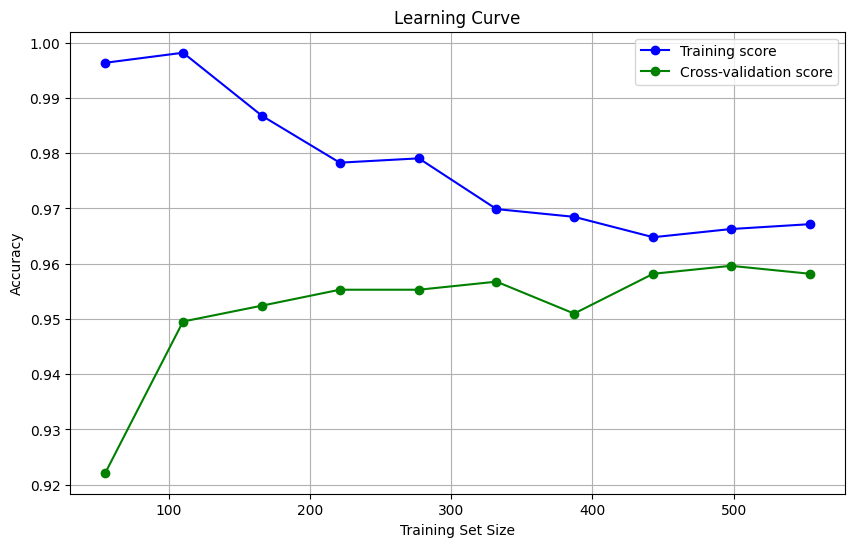

In [ ]:
logreg_standard = LogisticRegression(random_state=42)
logreg_standard.fit(X1_train_standard, y1_train_standard)

eval_classification(logreg_standard, X1_train_standard, y1_train_standard, X1_test_standard, y1_test_standard)
plot_confusion_matrix(logreg_standard, X1_test_standard, y1_test_standard)
plot_learning_curve(logreg_standard, X1_train_standard, y1_train_standard)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters found:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.97
Accuracy (Test Set): 0.98
Accuracy (Train Set): 0.97
Precision (Test Set): 0.99
Recall (Test Set): 0.97
F1-Score (Test Set): 0.98
roc_auc (test-proba): 0.99
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.97
Accuracy (crossval test): 0.97


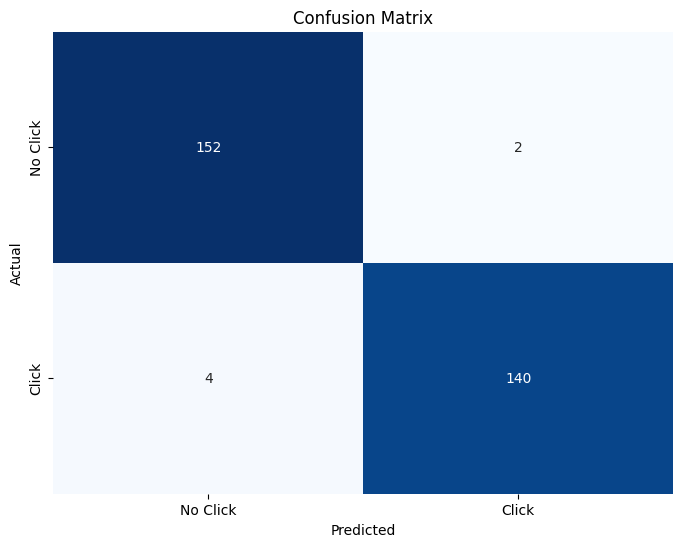

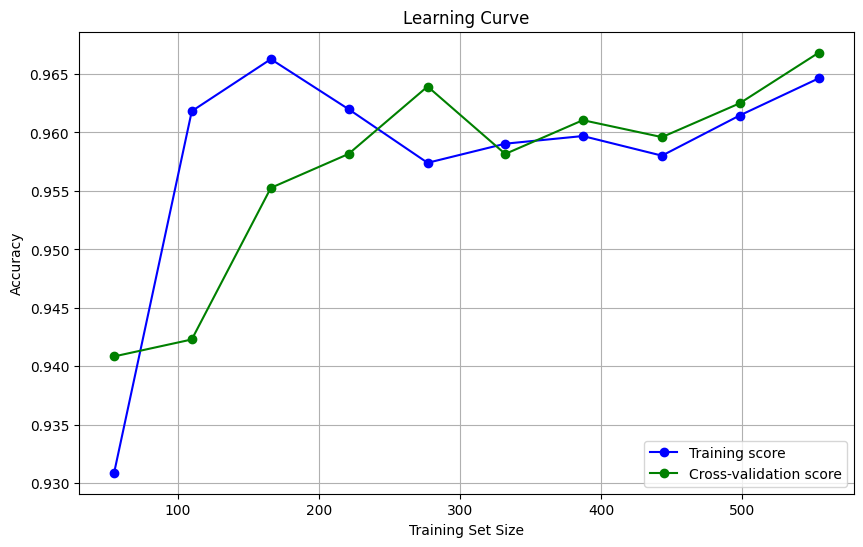

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

logreg_standard = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=logreg_standard, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X1_train_standard, y1_train_standard)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_logreg_standard = grid_search.best_estimator_
eval_classification(best_logreg_standard, X1_train_standard, y1_train_standard, X1_test_standard, y1_test_standard)
plot_confusion_matrix(best_logreg_standard, X1_test_standard, y1_test_standard)
plot_learning_curve(best_logreg_standard, X1_train_standard, y1_train_standard)


### 2. Decision Tree

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Precision (Test Set): 0.93
Recall (Test Set): 0.94
F1-Score (Test Set): 0.93
roc_auc (test-proba): 0.94
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.93
Accuracy (crossval test): 0.90


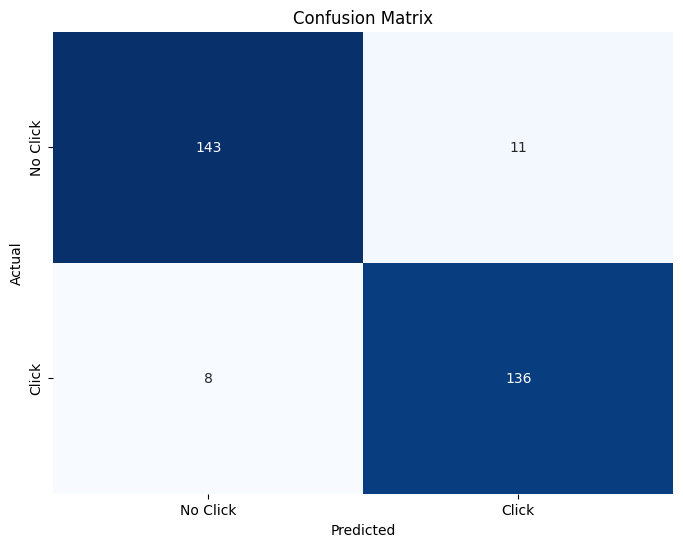

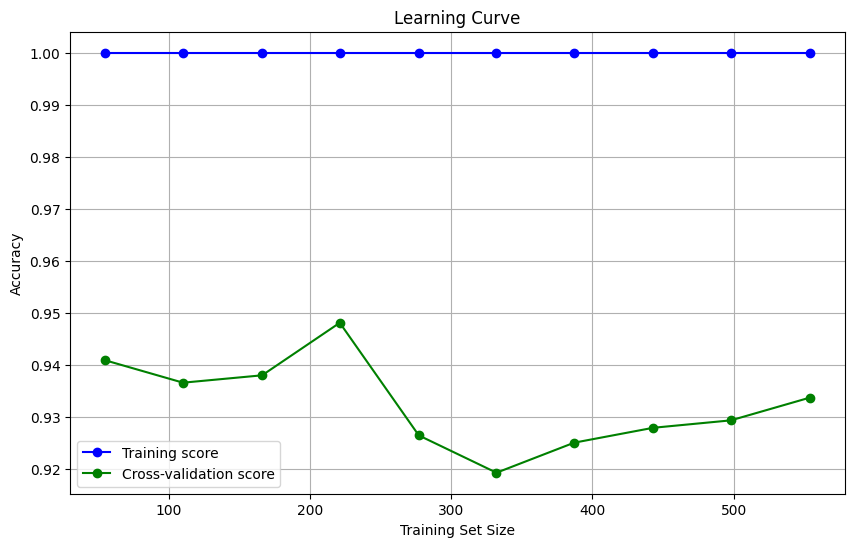

In [ ]:
tree_standard = DecisionTreeClassifier(random_state=42)
tree_standard.fit(X1_train_standard, y1_train_standard)

eval_classification(tree_standard, X1_train_standard, y1_train_standard, X1_test_standard, y1_test_standard)
plot_confusion_matrix(tree_standard, X1_test_standard, y1_test_standard)
plot_learning_curve(tree_standard, X1_train_standard, y1_train_standard)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Best cross-validation score: 0.94
Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.97
Precision (Test Set): 0.94
Recall (Test Set): 0.96
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.94
Accuracy (crossval test): 0.92


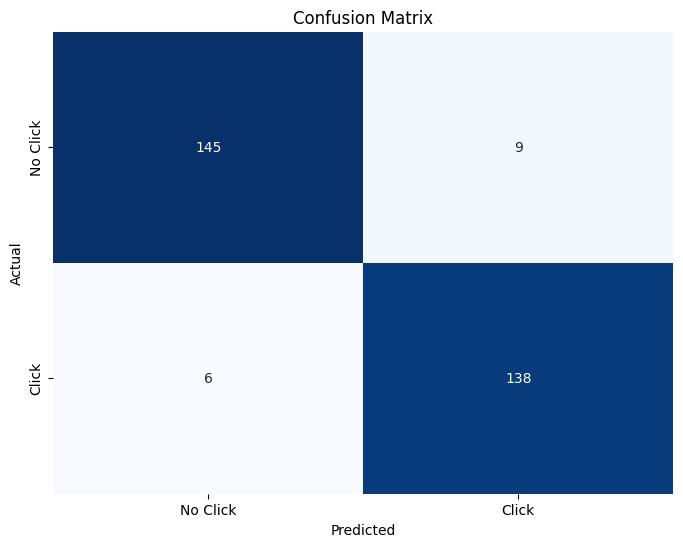

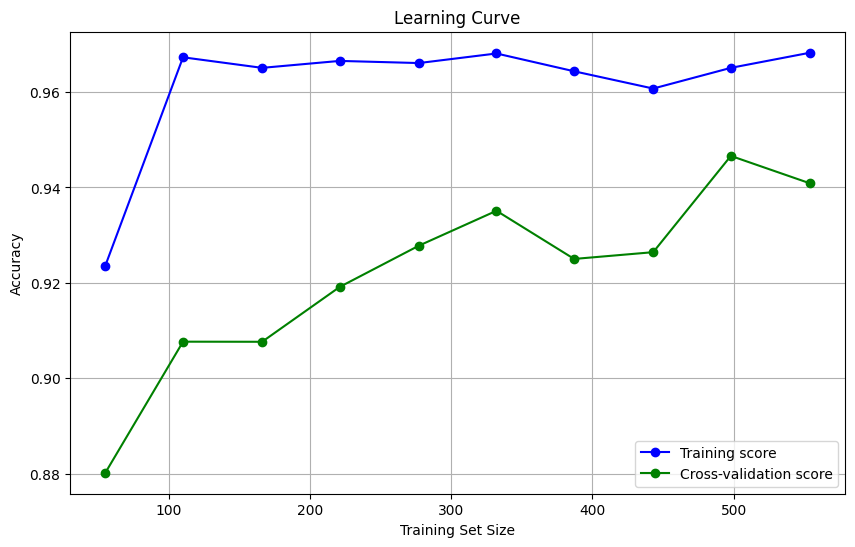

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_standard = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_standard, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X1_train_standard, y1_train_standard)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_tree_standard = grid_search.best_estimator_
eval_classification(best_tree_standard, X1_train_standard, y1_train_standard, X1_test_standard, y1_test_standard)
plot_confusion_matrix(best_tree_standard, X1_test_standard, y1_test_standard)
plot_learning_curve(best_tree_standard, X1_train_standard, y1_train_standard)


### 3. Random Forest

Accuracy (Test Set): 0.98
Accuracy (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Test Set): 0.97
F1-Score (Test Set): 0.98
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.96
Accuracy (crossval test): 0.96


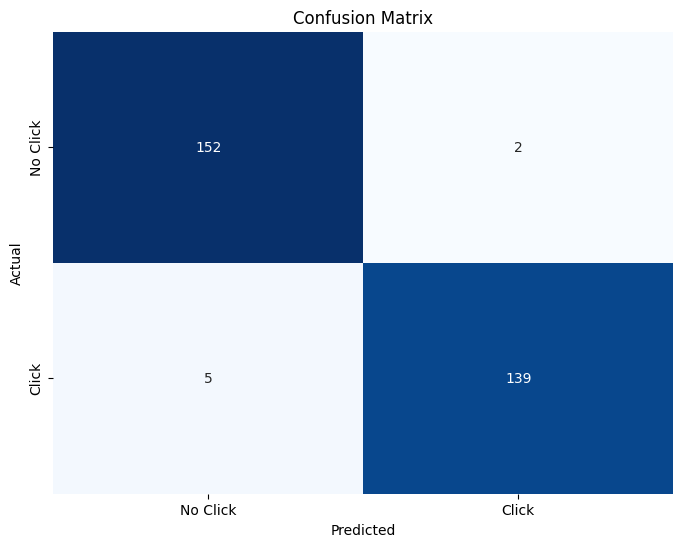

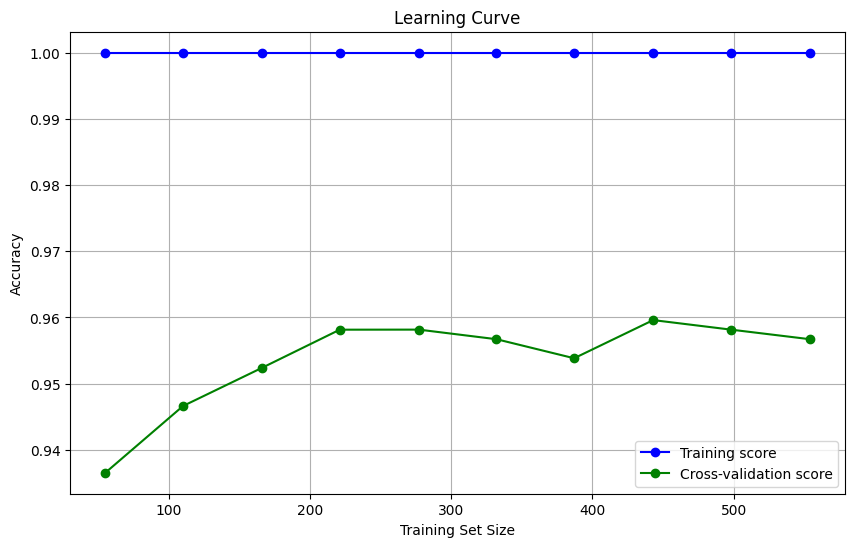

In [ ]:
forest_standard = RandomForestClassifier(random_state=42)
forest_standard.fit(X1_train_standard, y1_train_standard)

eval_classification(forest_standard, X1_train_standard, y1_train_standard, X1_test_standard, y1_test_standard)
plot_confusion_matrix(forest_standard, X1_test_standard, y1_test_standard)
plot_learning_curve(forest_standard, X1_train_standard, y1_train_standard)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.96
Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Test Set): 0.97
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.96
Accuracy (crossval test): 0.96


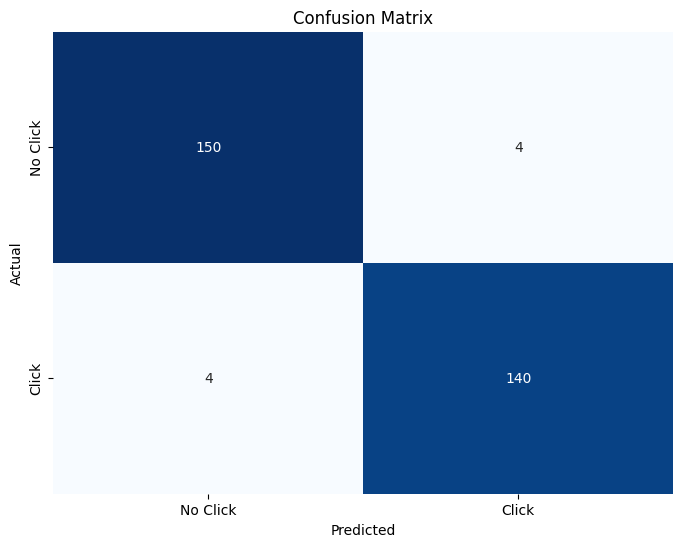

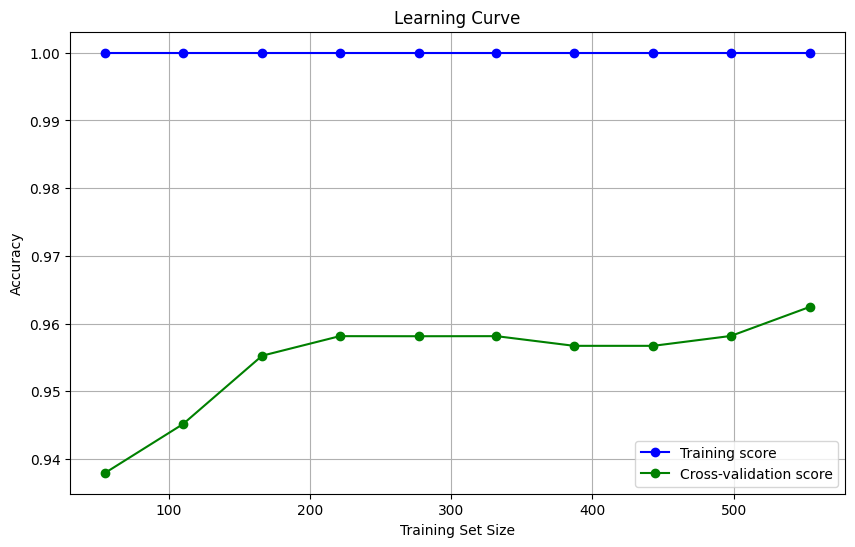

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

forest_standard = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=forest_standard, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X1_train_standard, y1_train_standard)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_forest_standard = grid_search.best_estimator_
eval_classification(best_forest_standard, X1_train_standard, y1_train_standard, X1_test_standard, y1_test_standard)
plot_confusion_matrix(best_forest_standard, X1_test_standard, y1_test_standard)
plot_learning_curve(best_forest_standard, X1_train_standard, y1_train_standard)


### 4. KNN

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.96
Precision (Test Set): 0.98
Recall (Test Set): 0.92
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.98
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.94
Accuracy (crossval test): 0.93


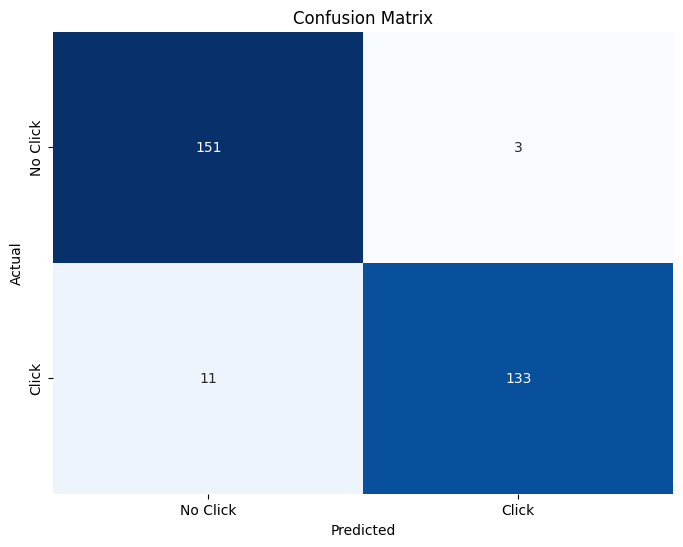

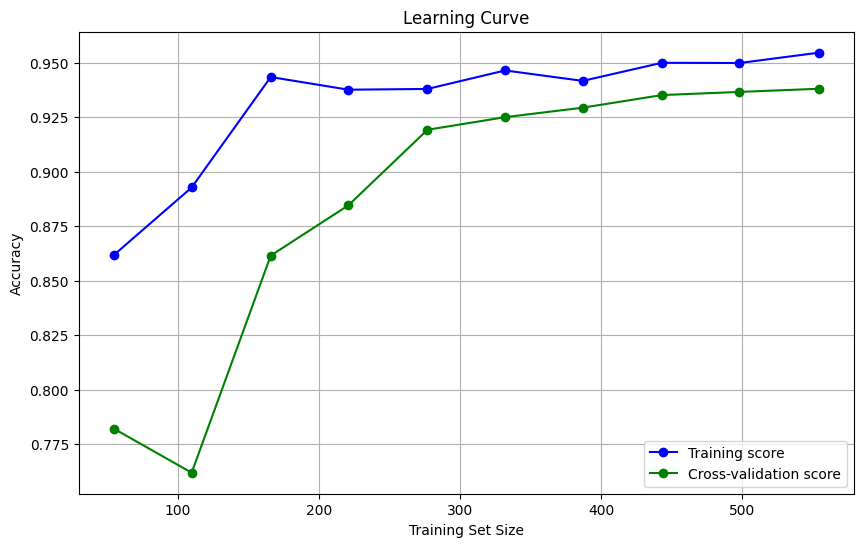

In [ ]:
knn_standard = KNeighborsClassifier()
knn_standard.fit(X1_train_standard, y1_train_standard)

eval_classification(knn_standard, X1_train_standard, y1_train_standard, X1_test_standard, y1_test_standard)
plot_confusion_matrix(knn_standard, X1_test_standard, y1_test_standard)
plot_learning_curve(knn_standard, X1_train_standard, y1_train_standard)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
Best parameters found:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.94
Accuracy (Test Set): 0.95
Accuracy (Train Set): 1.00
Precision (Test Set): 0.98
Recall (Test Set): 0.92
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.94
Accuracy (crossval test): 0.93


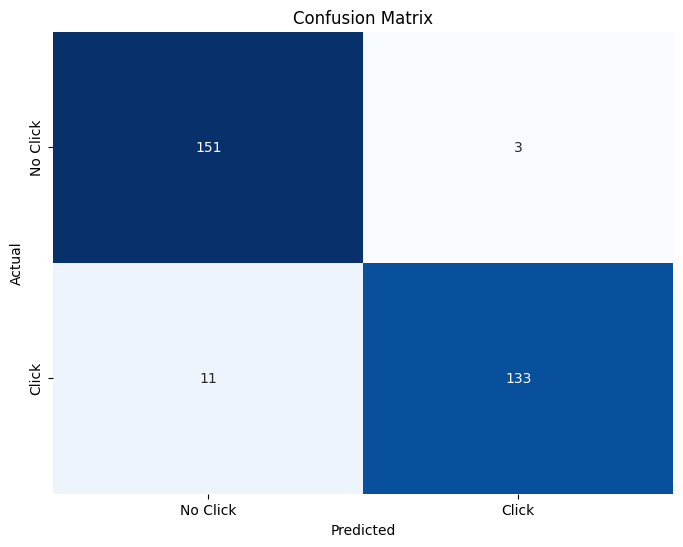

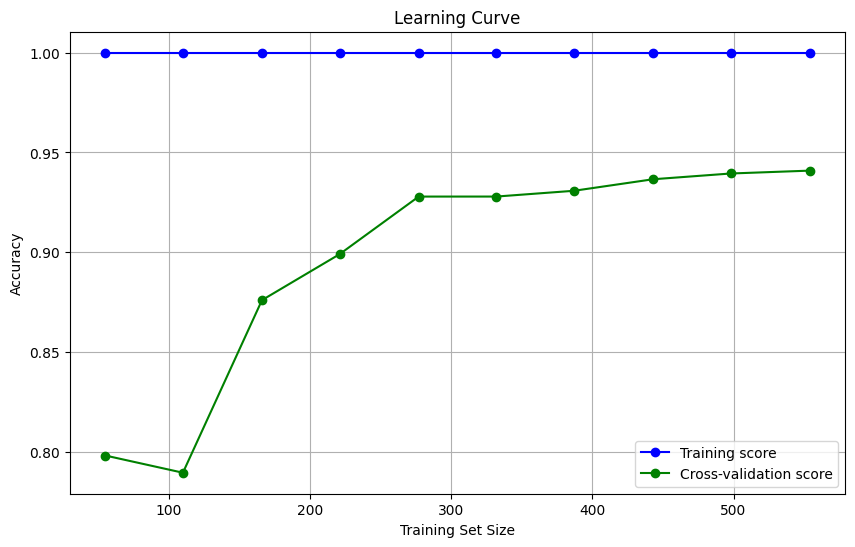

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50]
}

knn_standard = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_standard, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X1_train_standard, y1_train_standard)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_knn_standard = grid_search.best_estimator_
eval_classification(best_knn_standard, X1_train_standard, y1_train_standard, X1_test_standard, y1_test_standard)
plot_confusion_matrix(best_knn_standard, X1_test_standard, y1_test_standard)
plot_learning_curve(best_knn_standard, X1_train_standard, y1_train_standard)


### 5. Gradient Boosting

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Test Set): 0.97
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.95
Accuracy (crossval test): 0.95


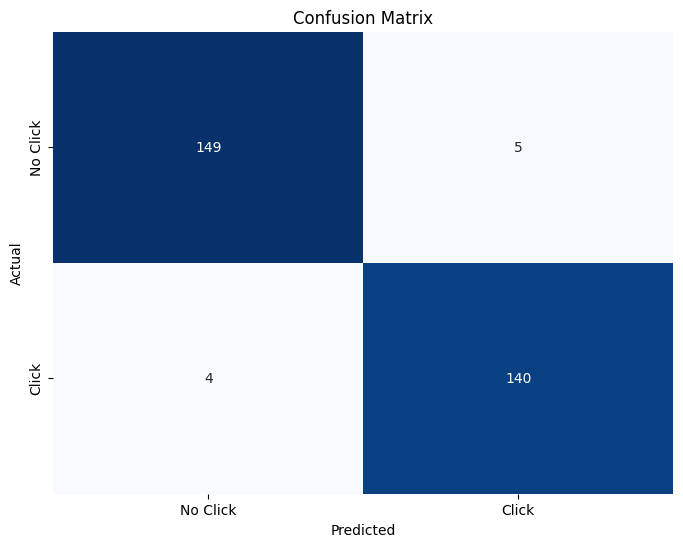

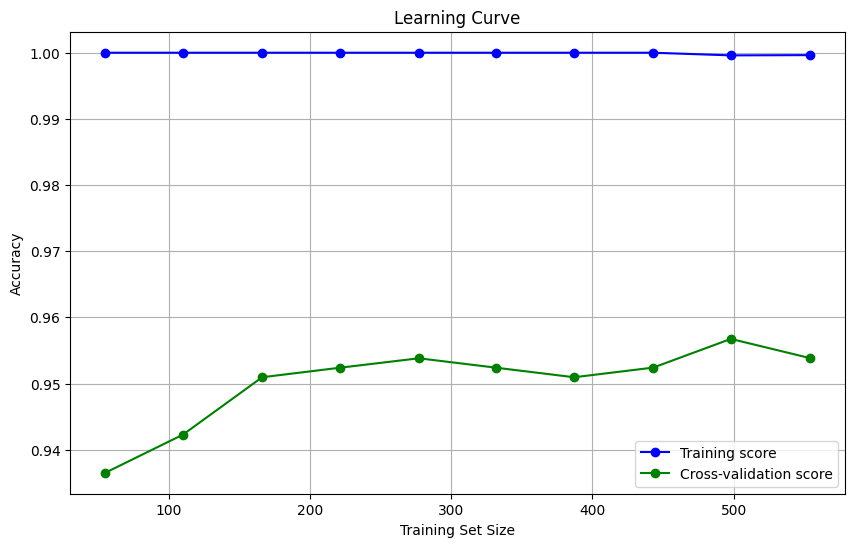

In [ ]:
gb_standard = GradientBoostingClassifier(random_state=42)
gb_standard.fit(X1_train_standard, y1_train_standard)

eval_classification(gb_standard, X1_train_standard, y1_train_standard, X1_test_standard, y1_test_standard)
plot_confusion_matrix(gb_standard, X1_test_standard, y1_test_standard)
plot_learning_curve(gb_standard, X1_train_standard, y1_train_standard)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation score: 0.96
Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Test Set): 0.97
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.96
Accuracy (crossval test): 0.96


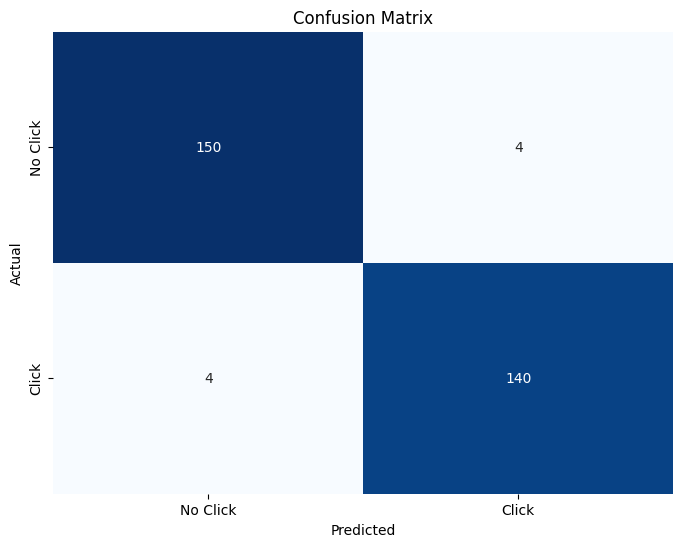

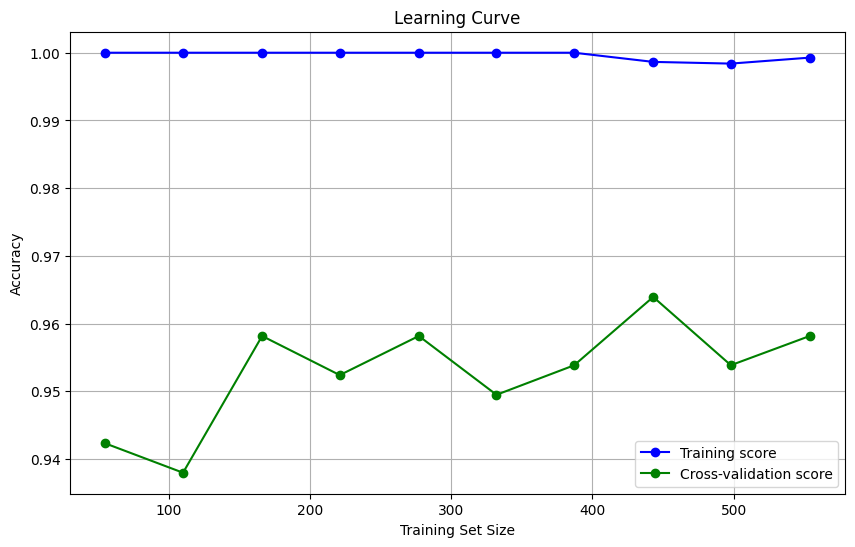

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2]
}

gb_standard = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_standard, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X1_train_standard, y1_train_standard)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_gb_standard = grid_search.best_estimator_
eval_classification(best_gb_standard, X1_train_standard, y1_train_standard, X1_test_standard, y1_test_standard)
plot_confusion_matrix(best_gb_standard, X1_test_standard, y1_test_standard)
plot_learning_curve(best_gb_standard, X1_train_standard, y1_train_standard)


# 12. Feature Importance

### Data before Standarization

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Fungsi untuk menampilkan confusion matrix dan menghitung metrik evaluasi
def plot_confusion_matrix(model, X_test, y_test):
    test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, test_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False,
                xticklabels=['No Click', 'Click'], yticklabels=['No Click', 'Click'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1_Score: {f1:.2f}")
    print(f"ROC_AUC: {roc_auc:.2f}")

# Evaluasi model pada data original
models_original_dict = {
    'Logistic Regression': best_logreg,
    'Decision Tree': best_tree,
    'Random Forest': best_forest,
    'K-Nearest Neighbors': best_knn,
    'Gradient Boosting': best_gb
}

accuracy_test = []
accuracy_train = []
recall_test_list = []
recall_train_list = []
accuracy_train_cv = []
accuracy_test_cv = []
time_elapsed = []
fit_time = []

for name, model in models_original_dict.items():
    start = time.time()
    model.fit(X1_train, y1_train)
    end = time.time()

    y_pred = model.predict(X1_test)
    y_pred_train = model.predict(X1_train)

    acc_test = accuracy_score(y1_test, y_pred)
    acc_train = accuracy_score(y1_train, y_pred_train)
    recall_test = recall_score(y1_test, y_pred)
    recall_train = recall_score(y1_train, y_pred_train)

    cv = RepeatedStratifiedKFold(random_state=42, n_repeats=3)
    score = cross_validate(model, X=X1_train, y=y1_train, cv=cv, scoring='accuracy', return_train_score=True)
    acc_train_cv = score['train_score'].mean()
    acc_test_cv = score['test_score'].mean()

    accuracy_test.append(acc_test)
    accuracy_train.append(acc_train)
    recall_test_list.append(recall_test)
    recall_train_list.append(recall_train)
    accuracy_train_cv.append(acc_train_cv)
    accuracy_test_cv.append(acc_test_cv)
    time_elapsed.append(end - start)
    fit_time.append(score['fit_time'].mean())

eval_dict = {
    'Model': models_original_dict.keys(),
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
    'Recall_test': recall_test_list,
    'Recall train': recall_train_list,
    'Accuracy_test_crossval': accuracy_test_cv,
    'Accuracy_train_crossval': accuracy_train_cv,
    'Time_elapsed': time_elapsed,
    'Fit_time': fit_time
}

eval_df = pd.DataFrame(data=eval_dict)
eval_df = eval_df.set_index('Model')
eval_df


,Accuracy_test,Accuracy_train,Recall_test,Recall train,Accuracy_test_crossval,Accuracy_train_crossval,Time_elapsed,Fit_time
Model,,,,,,,,
Logistic Regression,0.969799,0.966811,0.965278,0.953890,0.957213,0.965250,0.031792,0.146653
Decision Tree,0.949664,0.974026,0.958333,0.971182,0.932659,0.968614,0.009639,0.006478
Random Forest,0.976510,0.994228,0.972222,0.988473,0.957199,0.995430,0.626279,0.546532
K-Nearest Neighbors,0.687919,0.748918,0.548611,0.700288,0.705613,0.745311,0.005274,0.008471
Gradient Boosting,0.969799,1.000000,0.958333,1.000000,0.952859,1.000000,0.698591,0.361754


### Data Standardization

In [ ]:
models_standard_dict = {
    'Logistic Regression': best_logreg_standard,
    'Decision Tree': best_tree_standard,
    'Random Forest': best_forest_standard,
    'K-Nearest Neighbors': best_knn_standard,
    'Gradient Boosting': best_gb_standard
}

accuracy_test_standard = []
accuracy_train_standard = []
recall_test_list_standard = []
recall_train_list_standard = []
accuracy_train_cv_standard = []
accuracy_test_cv_standard = []
time_elapsed_standard = []
fit_time_standard = []

for name, model in models_standard_dict.items():
    start = time.time()
    model.fit(X1_train_standard, y1_train_standard)
    end = time.time()

    y_pred_standard = model.predict(X1_test_standard)
    y_pred_train_standard = model.predict(X1_train_standard)

    acc_test_standard = accuracy_score(y1_test_standard, y_pred_standard)
    acc_train_standard = accuracy_score(y1_train_standard, y_pred_train_standard)
    recall_test_standard = recall_score(y1_test_standard, y_pred_standard)
    recall_train_standard = recall_score(y1_train_standard, y_pred_train_standard)

    cv = RepeatedStratifiedKFold(random_state=42, n_repeats=3)
    score = cross_validate(model, X=X1_train_standard, y=y1_train_standard, cv=cv, scoring='accuracy', return_train_score=True)
    acc_train_cv_standard = score['train_score'].mean()
    acc_test_cv_standard = score['test_score'].mean()

    accuracy_test_standard.append(acc_test_standard)
    accuracy_train_standard.append(acc_train_standard)
    recall_test_list_standard.append(recall_test_standard)
    recall_train_list_standard.append(recall_train_standard)
    accuracy_train_cv_standard.append(acc_train_cv_standard)
    accuracy_test_cv_standard.append(acc_test_cv_standard)
    time_elapsed_standard.append(end - start)
    fit_time_standard.append(score['fit_time'].mean())

eval_dict_standard = {
    'Model': models_standard_dict.keys(),
    'Accuracy_test': accuracy_test_standard,
    'Accuracy_train': accuracy_train_standard,
    'Recall_test': recall_test_list_standard,
    'Recall train': recall_train_list_standard,
    'Accuracy_test_crossval': accuracy_test_cv_standard,
    'Accuracy_train_crossval': accuracy_train_cv_standard,
    'Time_elapsed': time_elapsed_standard,
    'Fit_time': fit_time_standard
}

eval_df_standard = pd.DataFrame(data=eval_dict_standard)
eval_df_standard = eval_df_standard.set_index('Model')
eval_df_standard


,Accuracy_test,Accuracy_train,Recall_test,Recall train,Accuracy_test_crossval,Accuracy_train_crossval,Time_elapsed,Fit_time
Model,,,,,,,,
Logistic Regression,0.979866,0.968254,0.972222,0.945245,0.962507,0.966331,0.007710,0.009694
Decision Tree,0.949664,0.974026,0.958333,0.971182,0.932659,0.968614,0.003830,0.004790
Random Forest,0.973154,1.000000,0.972222,1.000000,0.958631,1.000000,0.362772,0.363867
K-Nearest Neighbors,0.953020,1.000000,0.923611,1.000000,0.934105,1.000000,0.002941,0.004884
Gradient Boosting,0.973154,0.995671,0.972222,0.991354,0.953338,0.998918,0.290571,0.191823


### Comparison Best Model

In [ ]:
eval_df_combined = pd.concat([eval_df, eval_df_standard], keys=['Original', 'Standardized'])
eval_df_combined

Accuracy_test  Accuracy_train  Recall_test  \
             Model                                                             
Original     Logistic Regression       0.969799        0.966811     0.965278   
             Decision Tree             0.949664        0.974026     0.958333   
             Random Forest             0.976510        0.994228     0.972222   
             K-Nearest Neighbors       0.687919        0.748918     0.548611   
             Gradient Boosting         0.969799        1.000000     0.958333   
Standardized Logistic Regression       0.979866        0.968254     0.972222   
             Decision Tree             0.949664        0.974026     0.958333   
             Random Forest             0.973154        1.000000     0.972222   
             K-Nearest Neighbors       0.953020        1.000000     0.923611   
             Gradient Boosting         0.973154        0.995671     0.972222   

                                  Recall train  Accuracy_test_crossval  \
             Model                                                       
Original     Logistic Regression      0.953890                0.957213   
             Decision Tree            0.971182                0.932659   
             Random Forest            0.988473                0.957199   
             K-Nearest Neighbors      0.700288                0.705613   
             Gradient Boosting        1.000000                0.952859   
Standardized Logistic Regression      0.945245                0.962507   
             Decision Tree            0.971182                0.932659   
             Random Forest            1.000000                0.958631   
             K-Nearest Neighbors      1.000000                0.934105   
             Gradient Boosting        0.991354                0.953338   

                                  Accuracy_train_crossval  Time_elapsed  \
             Model                                                        
Original     Logistic Regression                 0.965250      0.031792   
             Decision Tree                       0.968614      0.009639   
             Random Forest                       0.995430      0.626279   
             K-Nearest Neighbors                 0.745311      0.005274   
             Gradient Boosting                   1.000000      0.698591   
Standardized Logistic Regression                 0.966331      0.007710   
             Decision Tree                       0.968614      0.003830   
             Random Forest                       1.000000      0.362772   
             K-Nearest Neighbors                 1.000000      0.002941   
             Gradient Boosting                   0.998918      0.290571   

                                  Fit_time  
             Model                          
Original     Logistic Regression  0.146653  
             Decision Tree        0.006478  
             Random Forest        0.546532  
             K-Nearest Neighbors  0.008471  
             Gradient Boosting    0.361754  
Standardized Logistic Regression  0.009694  
             Decision Tree        0.004790  
             Random Forest        0.363867  
             K-Nearest Neighbors  0.004884  
             Gradient Boosting    0.191823

In [ ]:
best_model_original = eval_df_combined.loc['Original'].idxmax()['Accuracy_test']
best_model_standard = eval_df_combined.loc['Standardized'].idxmax()['Accuracy_test']

print(f"Best model for Original Data based on accuracy: {best_model_original}")
print(f"Best model for Standardized Data based on accuracy: {best_model_standard}")


Best model for Original Data based on accuracy: Random Forest
Best model for Standardized Data based on accuracy: Logistic Regression


### Feature Importance Data before Standardization (Random Forest)

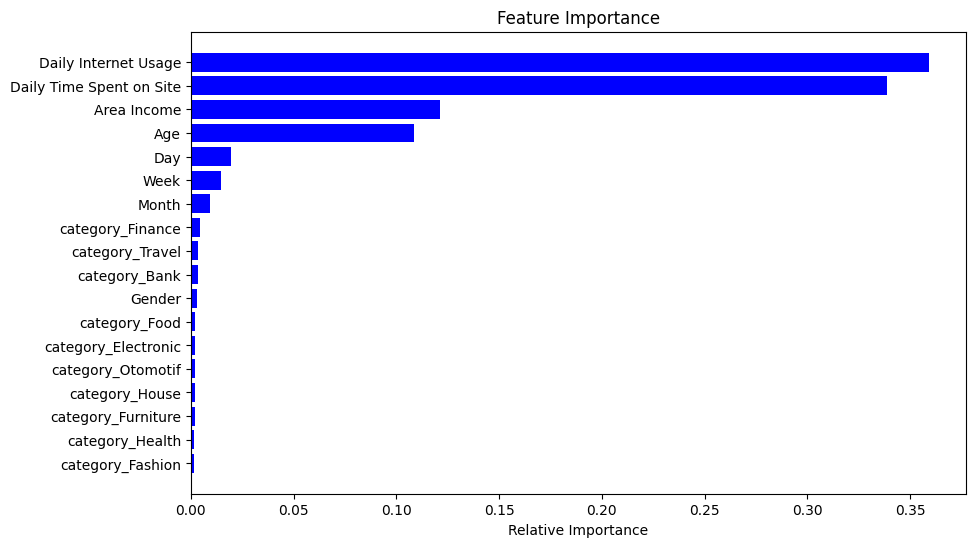

,Feature,Importance
3,Daily Internet Usage,0.359213
0,Daily Time Spent on Site,0.338777


In [ ]:
def display_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    else:
        raise ValueError("Model does not have feature_importances_ or coef_ attribute")

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    top_2_features = feature_importance_df.head(2)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='b', align='center')
    plt.xlabel('Relative Importance')
    plt.gca().invert_yaxis()
    plt.title('Feature Importance')
    plt.show()

    return top_2_features
top_2_features_original = display_feature_importance(best_forest, X1_train.columns)
top_2_features_original


Key Takeaways:
- Berdasarkan chart feature importance dari modelling data yang belum di standarisasi, diketahui bahwa fitur **Daily Internet Usage** dan **Daily Time Spent on Site** adalah fitur yang paling mempengaruhi model.

### Feature Importance Data Standardization (Logistic Regression)

Feature Importance for the Best Model (Standardized Data - Logistic Regression):


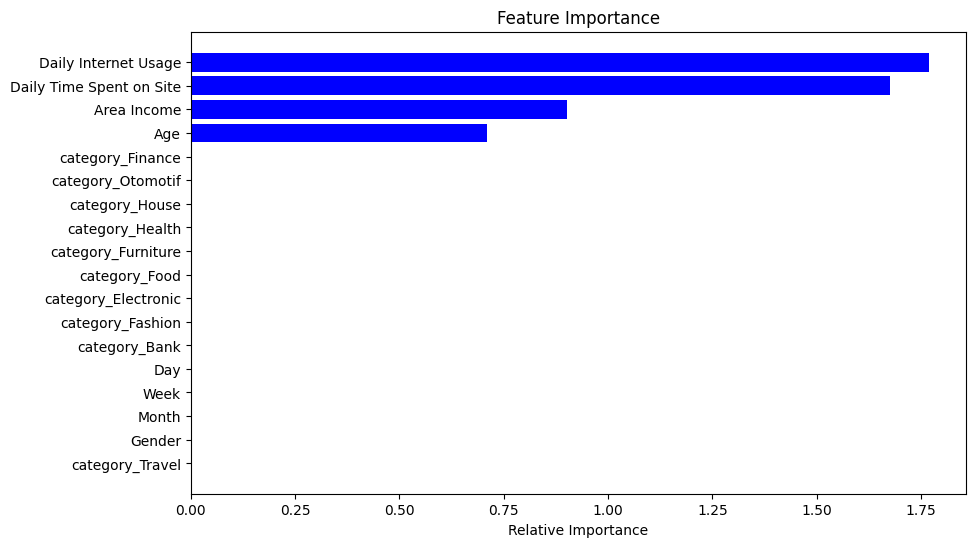

,Feature,Importance
3,Daily Internet Usage,1.769216
0,Daily Time Spent on Site,1.675477


In [ ]:
print(f"Feature Importance for the Best Model (Standardized Data - Logistic Regression):")
top_2_features_standard = display_feature_importance(best_logreg_standard, X1_train_standard.columns)
top_2_features_standard


Key Takeaways:
- Berdasarkan chart feature importance dari modelling data yang di standarisasi, diketahui bahwa fitur **Daily Internet Usage** dan **Daily Time Spent on Site** adalah fitur yang paling mempengaruhi model.

# 13. Business Insights and Recomendation

## Insights

Berdasarkan hasil Exploratory Data Analysis, berikut adalah beberapa faktor yang mempengaruhi Conversion Rate customer:

1. **Daily Time Spent on Site**:
  
  - Customer yang menghabiskan waktu lebih sedikit di situs cenderung lebih sering mengklik iklan. Ini bisa diartikan bahwa mereka lebih fokus pada iklan yang mereka lihat dan lebih cenderung untuk mengkliknya.

2. **Age**:

  - Rentang usia 30-60 tahun adalah yang paling banyak mengklik iklan. Ini menunjukkan bahwa kelompok usia ini lebih responsif terhadap iklan.


3. **Daily Internet Usage**:

  - Customer dengan penggunaan internet harian yang lebih kecil lebih sering mengklik iklan. Ini menunjukkan bahwa pengguna yang kurang sering online mungkin lebih tertarik dengan iklan yang mereka lihat.

4. **Area Income**:
  - Customer dari area dengan pendapatan yang lebih rendah cenderung mengklik iklan lebih banyak. Ini mungkin menunjukkan bahwa mereka lebih responsif terhadap penawaran dan diskon.


Rekomendasi Bisnis:
1. Menargetkan customer dengan usia rentang 30-60 tahun, menyesuaikan konten iklan yang akan ditampilkan untuk kelompok usia ini agar lebih menarik untuk di klik.

2. Memberikan iklan dalam bentuk promosi atau diskon kepada customer dengan kategori income rendah - menengah, karena kelompok ini paling sering mengklik iklan.

3. Menayangkan iklan secara berkala dalam waktu tertentu dan memberikan tampilan iklan yang bervariasi kategorinya, untuk membuat customer dengan daily time spent dan daily internet usage yang tinggi bisa mendapatkan promosi iklan yang sesuai hingga customer tertarik untuk mengklik iklan


## Simulation

**Asumsi:**

  - Jumlah Customer (N): 1000
  - Total Cost (C): Rp 1.000
  - Pendapatan per Konversi (R): Rp 100.000
  - Tingkat Konversi:

    - Tanpa Machine Learning (CR1): 2% (tingkat konversi dasar tanpa pemasaran yang ditargetkan).
    
    - Dengan Machine Learning (CR2): 5% (tingkat konversi yang lebih tinggi dengan pemasaran yang ditargetkan).

**Simulasi Bisnis tanpa Machine Learning**

  - Total Cost = N × C
  - Conversion = N × CR1
  - Revenue = Conversion × R
  - Profit = Revenue − Total Cost

Perhitungan:

  - Total Cost: 1000 × 1.000 = Rp 1.000.000
  - Conversion: 1000 × 0.02 = 20
  - Revenue: 20 × 100.000 = Rp 2.000.000
  - Profit: 2.000.000 − 1.000.000 = Rp 1.000.000

**Simulasi Bisnis dengan Machine Learning**
  - Total Cost = N × C
  - Conversion = N × CR2
  - Revenue = Conversion × R
  - Profit = Revenue − Total Cost

Perhitungan

  - Dengan Machine Learning
  - Total Cost: 1000 × 1.000 = Rp 1.000.000
  - Conversion: 1000 × 0.05 = 50
  - Revenue: 50 × 100.000 = Rp 5.000.000
  - Profit: 5.000.000 − 1.000.000 = Rp 4.000.000

**Conclusion:**

  - Menggunakan machine learning untuk menargetkan customer yang mungkin mengklik iklan dapat secara signifikan meningkatkan conversion rate dari 2% menjadi 5%. Hal ini menyebabkan peningkatan profit dari Rp1,000,000 menjadi Rp4,000,000 meskipun total biaya pemasaran tetap sama.